Libraries and configuration

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import probplot, skew, norm

plt.style.use('default')

class bc:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

Data

In [2]:
genotypes = ['WT MI', 'WT no MI(new)', 'MYC MI', 'MYC no MI']

In [3]:
def load_data(folder, type='monotot', sheet=0):
    data = pd.read_excel(folder + type + '_results(vox).xlsx', sheet_name=sheet)

    return (
        data['IntegratedIntensity'],
        data['VolumeUm'],
        data['DapiIntensityMean']
    )

Plotting

In [4]:
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks


def plot_kde(
        neg, pos, title, include_hist=False,
        sub_index=None, n_rows=1, n_cols=1,
        xlim=None, labels=None
):    
    plt.figure(figsize=(8, 5))
        
    f, (ax_plot, ax_rug1, ax_rug2) = plt.subplots(
        3, sharex=True, gridspec_kw={
            "height_ratios": (1, 0.05, 0.05)
        }
    )
        
    sns.rugplot(neg, color='blue', alpha=.3, height=1, linewidth=3.5, expand_margins=False, ax=ax_rug1)
    sns.rugplot(pos, color='green', alpha=.3, height=1, linewidth=3.5, expand_margins=False, ax=ax_rug2)

    kde_1 = sns.kdeplot(neg, linewidth=4, color='blue', ax=ax_plot)    
    kde_2 = sns.kdeplot(pos, linewidth=4, color='green', ax=ax_plot)

    if include_hist:
        sns.histplot(x=neg, kde=True, color='blue', alpha=.0, linewidth=0)
        sns.histplot(x=pos, kde=True, color='green', alpha=.0, linewidth=0)    
    
    plt.title(title)
    # plt.legend(labels, fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(fontsize=0)
    plt.yticks(fontsize=0)
    
    for a in [ax_plot, ax_rug1, ax_rug2]:
        a.set(
            xlabel='', ylabel='',
            xticklabels=[], yticklabels=[]
        )
        
    for a in [ax_rug1, ax_rug2]:
        
        a.set(xticks=[], yticks=[])
        
        for spine in a.spines.values():
            spine.set_visible(False)
    
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    plt.tight_layout()
    
    # Get KDE data points for 'neg' and 'pos'
    neg_kde_x, neg_kde_y = kde_1.get_lines()[0].get_data()
    pos_kde_x, pos_kde_y = kde_2.get_lines()[1].get_data()
            
    # Function to find valley between two peaks in KDE data
    def find_valley(kde_x, kde_y):
        # Find peaks in the KDE curve
        peaks, _ = find_peaks(kde_y)
        # Find valleys (local minima) in the KDE curve
        valleys, _ = find_peaks(-kde_y)  # Peaks of the negative curve are the valleys

        # Get the valley between the two peaks, if there are at least two peaks
        if len(peaks) >= 2:
            peak_1, peak_2 = peaks[:2]  # Assuming the first two peaks are the main ones
            valley = valleys[(valleys > peak_1) & (valleys < peak_2)]  # Valley between the two peaks
            if len(valley) > 0:
                valley_x = kde_x[valley[0]]  # X-coordinate of the valley
                print(f"Valley between peaks at x = {valley_x}")
            else:
                valley_x = None
                print("No valley found between the peaks.")
        elif len(peaks) == 1:
            # If there is only one peak, find the first valley after it
            peak_1 = peaks[0]
            valley = valleys[valleys > peak_1]  # First valley after the single peak
            if len(valley) > 0:
                valley_x = kde_x[valley[0]]  # X-coordinate of the valley
                print(f"Valley after single peak at x = {valley_x}")
            else:
                valley_x = None
                print("No valley found after the single peak.")
        else:
            valley_x = None
            print("Fewer than two peaks detected.")
        
        return valley_x

    # Find valleys for 'neg' and 'pos' distributions
    neg_valley_x = find_valley(neg_kde_x, neg_kde_y)
    pos_valley_x = find_valley(pos_kde_x, pos_kde_y)
    
    print(f'Negative valley: {neg_valley_x}')
    print(f'Positive valley: {pos_valley_x}')
    
    if neg_valley_x:
        ax_plot.axvline(neg_valley_x, color='blue', linestyle='--')
    if pos_valley_x:
        ax_plot.axvline(pos_valley_x, color='green', linestyle='--')
    
    return kde_1.get_lines()[0].get_data(), kde_2.get_lines()[1].get_data()


import numpy as np
from scipy.signal import find_peaks
import seaborn as sns
import matplotlib.pyplot as plt

def plot_kde_single(
        neg, title, include_hist=False,
        sub_index=None, n_rows=1, n_cols=1,
        xlim=None, labels=None, valley=True, placeholder=False,
):    
    plt.figure(figsize=(8, 5))
        
    sns.rugplot(neg, color='green', alpha=1, height=.1, linewidth=3.5, expand_margins=False)

    kde_1 = sns.kdeplot(neg, linewidth=4, color='green')

    if include_hist:
        sns.histplot(x=neg, kde=True, color='green', alpha=.0, linewidth=0)
    
    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(fontsize=0)
    plt.yticks(fontsize=0)
    
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    plt.tight_layout()
    
    # Get the KDE data
    kde_x, kde_y = kde_1.get_lines()[0].get_data()
    
    # Function to find the valley between peaks
    def find_valley(kde_x, kde_y):
        peaks, _ = find_peaks(kde_y)
        valleys, _ = find_peaks(-kde_y)

        if len(peaks) >= 2:
            peak_1, peak_2 = peaks[:2]
            valley = valleys[(valleys > peak_1) & (valleys < peak_2)]
            if len(valley) > 0:
                valley_x = kde_x[valley[0]]
                print(f"Valley between peaks at x = {valley_x}")
            else:
                valley_x = None
                print("No valley found between the peaks.")
        else:
            valley_x = None
            print("Fewer than two peaks detected.")
        
        return valley_x
    
    # Function to compute count percentages up to and after the valley
    def compute_count_percentages(neg, split_x):
        count_before = np.sum(neg <= split_x)
        count_after = np.sum(neg > split_x)
        total_count = len(neg)
        return count_before / total_count, count_after / total_count

    valley_x = find_valley(kde_x, kde_y)
    
    if placeholder:
        valley_x = 5.05
    
    if valley_x and valley:
        plt.axvline(valley_x, color='black', linestyle='--')
    
    else: # Put text in the middle of the plot indicating there is no valley
        if valley:
            y_max = np.max(kde_y)
            
            plt.text(8, y_max * 0.5, 'No valley detected',
                        horizontalalignment='center', verticalalignment='center',
                        fontsize=12, color='black')
        
    
    if valley_x is not None and valley:
        before_valley, after_valley = compute_count_percentages(neg, valley_x)
        print(f"Percentage of counts before valley: {before_valley * 100:.2f}%")
        print(f"Percentage of counts after valley: {after_valley * 100:.2f}%")

        # Annotate the percentages on the plot
        y_max = np.max(kde_y)
        plt.text(valley_x, y_max * 0.5, f'{before_valley * 100:.2f}%', 
                 horizontalalignment='right', verticalalignment='center', 
                 fontsize=12, color='black')
        plt.text(valley_x, y_max * 0.5, f'{after_valley * 100:.2f}%', 
                 horizontalalignment='left', verticalalignment='center', 
                 fontsize=12, color='black')
    else:
        before_valley, after_valley = None, None
        print("No valley detected, unable to calculate count percentages.")

    return kde_1.get_lines()[0].get_data(), before_valley, after_valley
    
    
def plot_boxplot(
        neg, pos, title,
        sub_index=None, n_rows=1, n_cols=1
):
    if sub_index:
        plt.subplot(n_rows, n_cols, sub_index)
    else:
        plt.figure(figsize=(10, 8))
        
    data = pd.melt(pd.DataFrame({
        'values': np.concatenate([neg, pos]),
        'group': ['Negative'] * len(neg) + ['Positive'] * len(pos)
    }), id_vars='group', var_name='features', value_name='value')
    
    sns.boxplot(
        data=data, 
        x='features', y='value',
        hue='group', palette=['red', 'green']
    )
    
    plt.title(title)
    plt.legend(['Negative', 'Positive'])
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.tight_layout()
    
    
def plot_probability(
        neg, pos, title,
        sub_index=None, n_rows=1, n_cols=1
):
    if sub_index:
        plt.subplot(n_rows, n_cols, sub_index)
    else:
        plt.figure(figsize=(10, 8))
        
    skewness = skew(np.concatenate([neg, pos]))
    probplot(np.concatenate([neg, pos]), plot=plt)
    
    plt.title(title + f' (Skewness: {skewness:.2f})')
    plt.legend(['Negative', 'Positive'])
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.tight_layout()

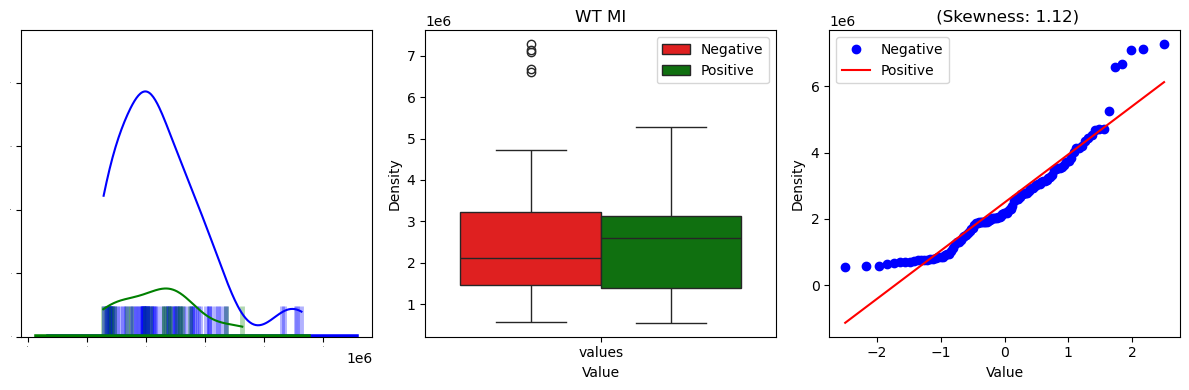

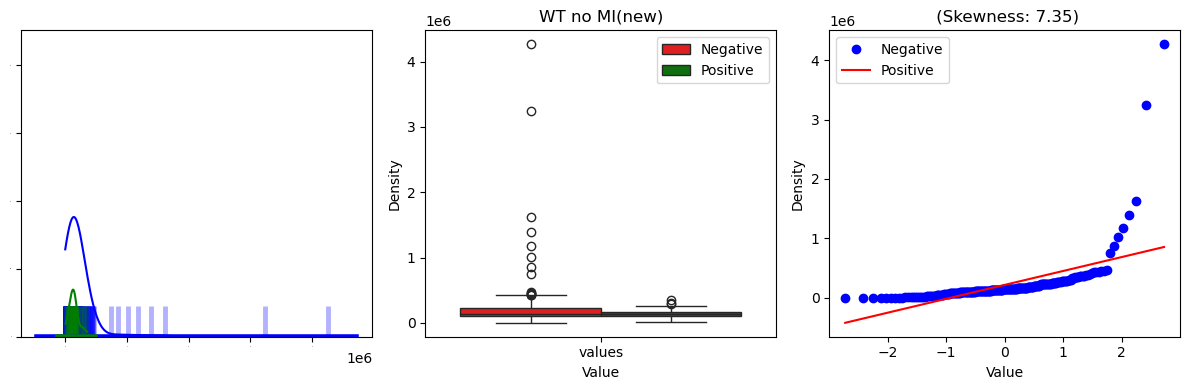

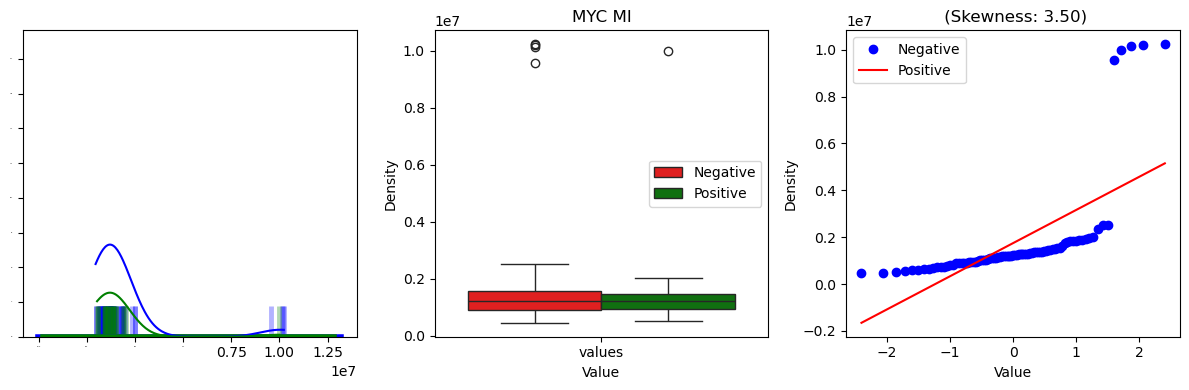

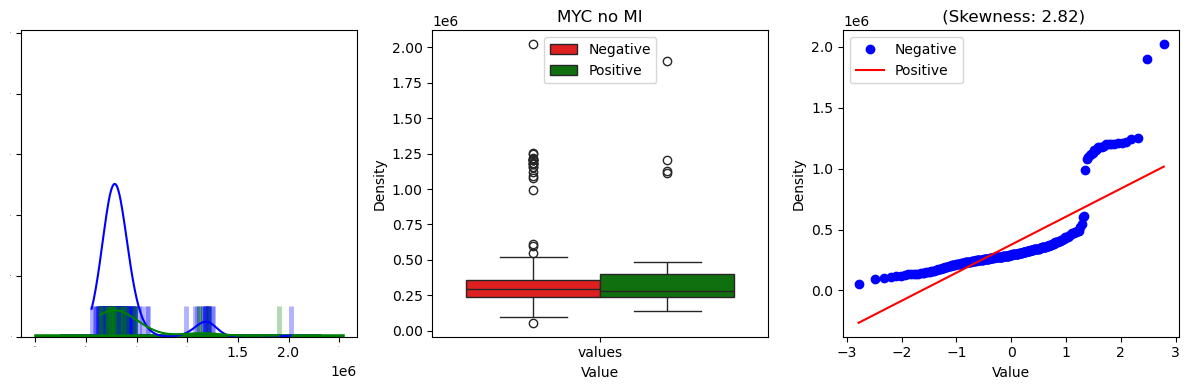

In [14]:
for i, genotype in enumerate(genotypes):
    plt.figure(figsize=(12, 4))
    
    folder = '/run/user/1003/gvfs/smb-share:server=tierra.cnic.es,share=sc/LAB_MT/LAB/Morena/Cri/Segmentation tests Mar2024/DATA/' + genotype + '/Segmentation(Stardist)/'
    
    mono_neg_intensity, _, _ = load_data(folder, 'monotot', 0)
    mono_pos_intensity, _, _ = load_data(folder, 'monotot', 1)

    bi_neg_intensity, _, _ = load_data(folder, 'bitot', 0)
    bi_pos_intensity, _, _ = load_data(folder, 'bitot', 1)
    
    plot_kde(mono_neg_intensity, mono_pos_intensity, '', True, 1, 1, 3)    
    plot_boxplot(mono_neg_intensity, mono_pos_intensity, f'{genotype}', 2, 1, 3)
    plot_probability(mono_neg_intensity, mono_pos_intensity, '', 3, 1, 3)

    plt.show()

KDE plots

In [5]:
def center_kde(data, center=0):
    def find_mode(data, bins=100):
        hist, bin_edges = np.histogram(data, bins=bins)
        return bin_edges[np.argmax(hist)]
    
    mu_mono_neg = find_mode(data['mono_neg'])
    mu_bi_neg = find_mode(data['bi_neg'])
    
    mono_neg_i_centered = data['mono_neg'] - mu_mono_neg + center
    mono_pos_i_centered = data['mono_pos'] - mu_mono_neg + center
    
    bi_neg_i_centered = data['bi_neg'] - mu_bi_neg + center
    bi_pos_i_centered = data['bi_pos'] - mu_bi_neg + center
    
    return mono_neg_i_centered, mono_pos_i_centered, bi_neg_i_centered, bi_pos_i_centered

def get_mu_s(data):
    return np.mean(data), np.std(data)

def normalize(data, mu, sigma):
    """Z-score normalization"""
    return (data - mu) / sigma


WT MI
Fewer than two peaks detected.
No valley detected, unable to calculate count percentages.


<Figure size 1600x400 with 0 Axes>

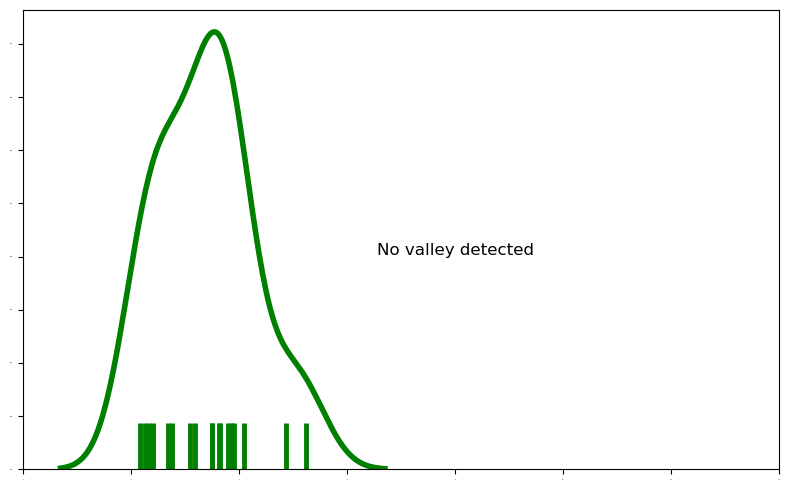

Fewer than two peaks detected.
Percentage of counts before valley: 81.93%
Percentage of counts after valley: 18.07%


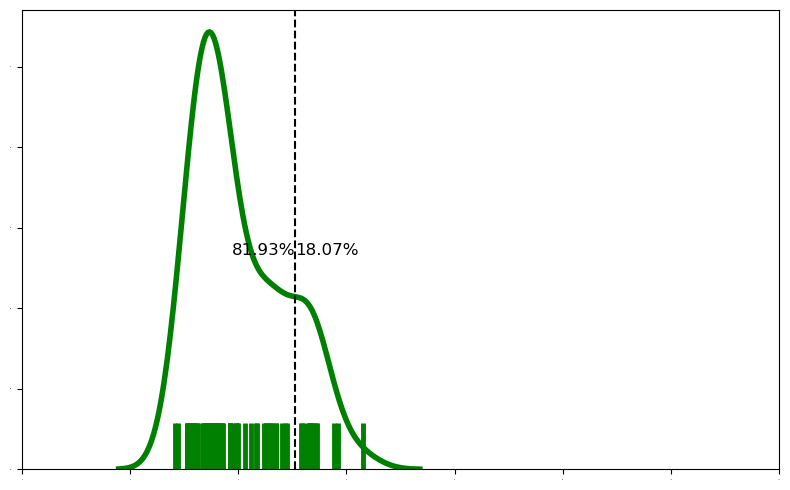

Fewer than two peaks detected.
No valley detected, unable to calculate count percentages.


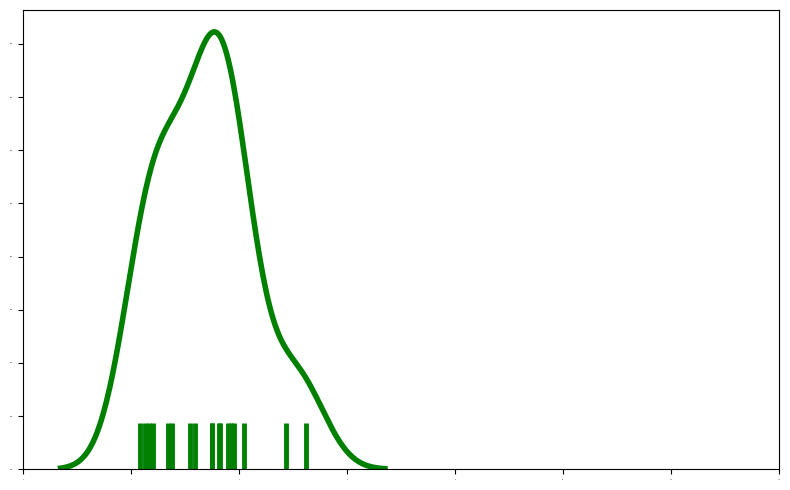

Fewer than two peaks detected.
No valley detected, unable to calculate count percentages.


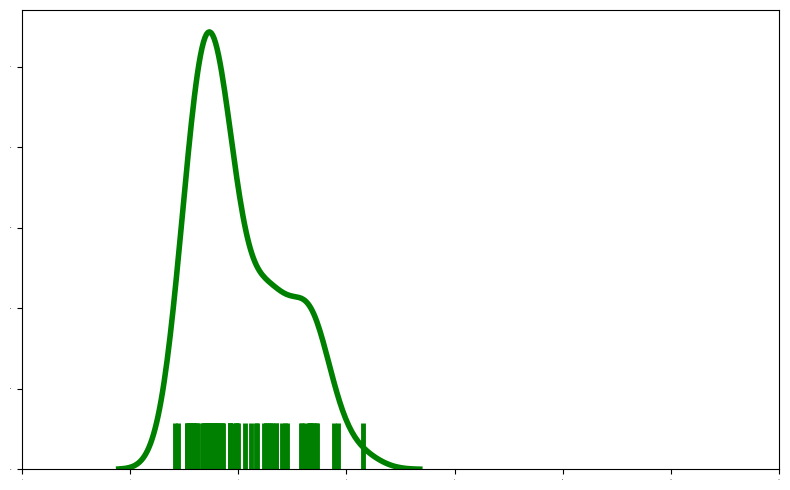

WT no MI(new)
Fewer than two peaks detected.
No valley detected, unable to calculate count percentages.


<Figure size 1600x400 with 0 Axes>

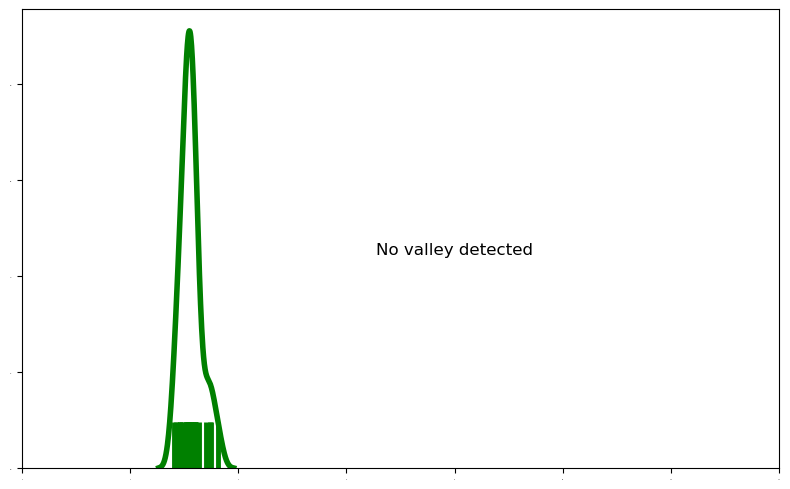

Valley between peaks at x = 7.71360677699731
Percentage of counts before valley: 97.16%
Percentage of counts after valley: 2.84%


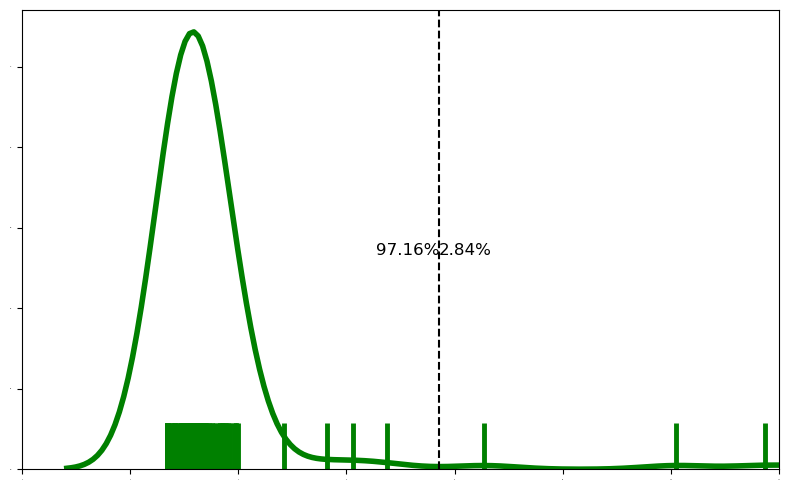

Fewer than two peaks detected.
No valley detected, unable to calculate count percentages.


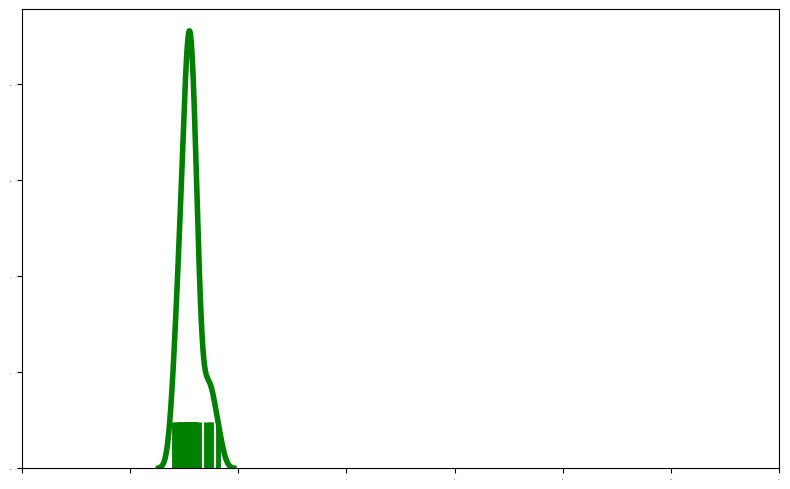

Valley between peaks at x = 7.71360677699731
No valley detected, unable to calculate count percentages.


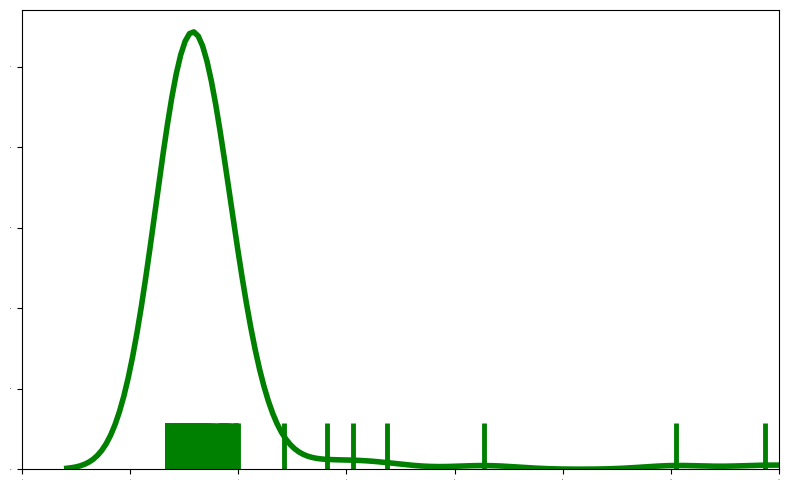

MYC MI
Valley between peaks at x = 5.228437266928026
Percentage of counts before valley: 96.00%
Percentage of counts after valley: 4.00%


<Figure size 1600x400 with 0 Axes>

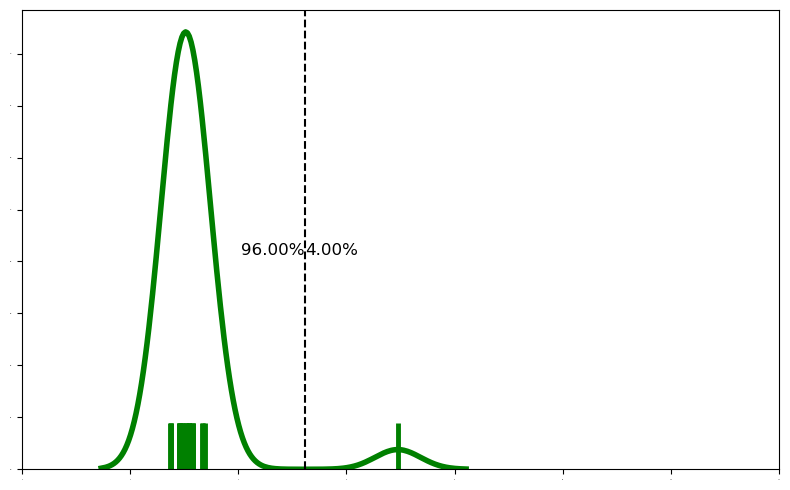

Valley between peaks at x = 5.078557045598226
Percentage of counts before valley: 75.00%
Percentage of counts after valley: 25.00%


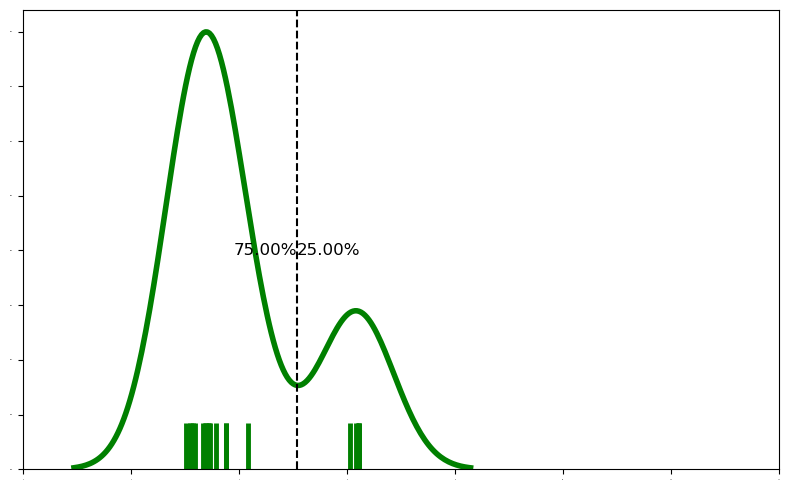

Valley between peaks at x = 5.228437266928026
No valley detected, unable to calculate count percentages.


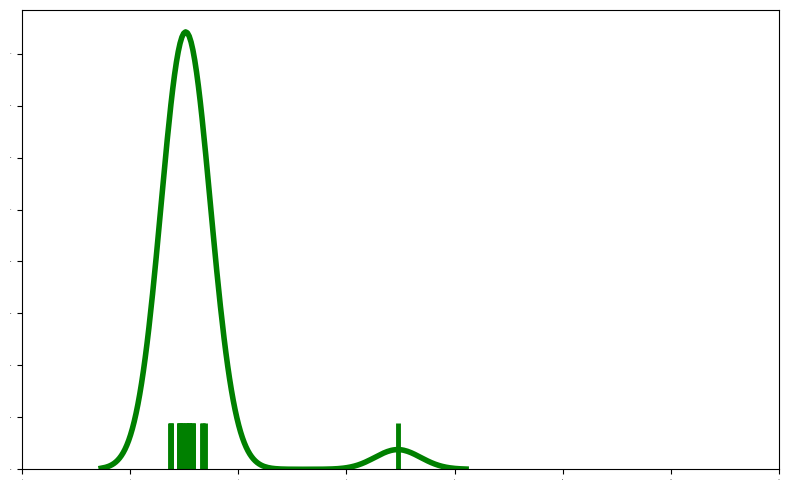

Valley between peaks at x = 5.078557045598226
No valley detected, unable to calculate count percentages.


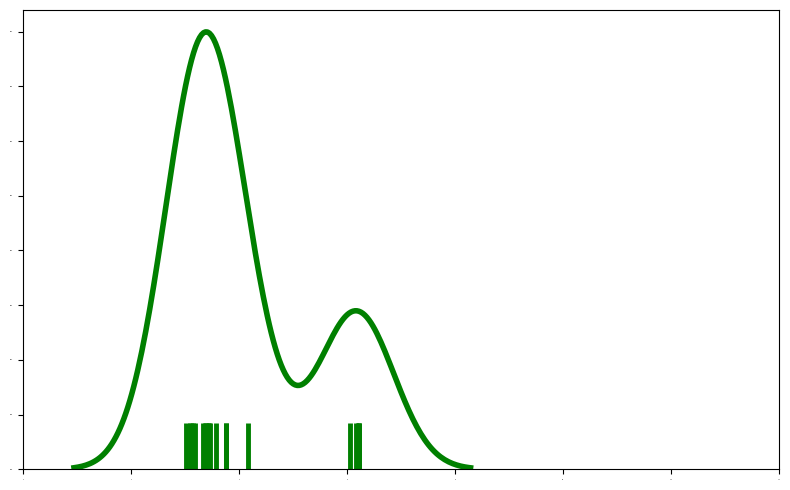

MYC no MI
Valley between peaks at x = 5.251607942643711
Percentage of counts before valley: 85.71%
Percentage of counts after valley: 14.29%


<Figure size 1600x400 with 0 Axes>

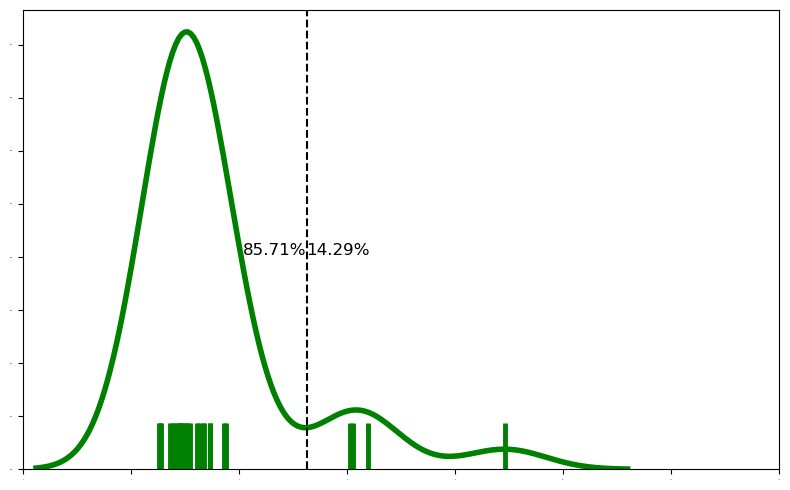

Valley between peaks at x = 4.728496813616027
Percentage of counts before valley: 90.51%
Percentage of counts after valley: 9.49%


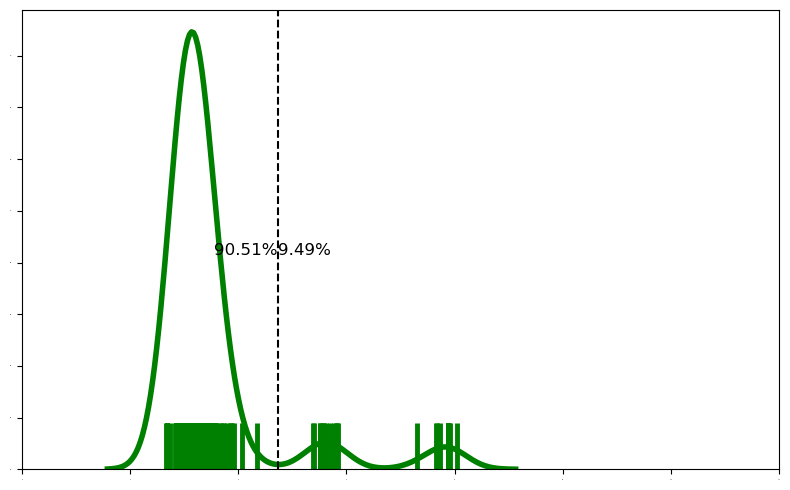

Valley between peaks at x = 5.251607942643711
No valley detected, unable to calculate count percentages.


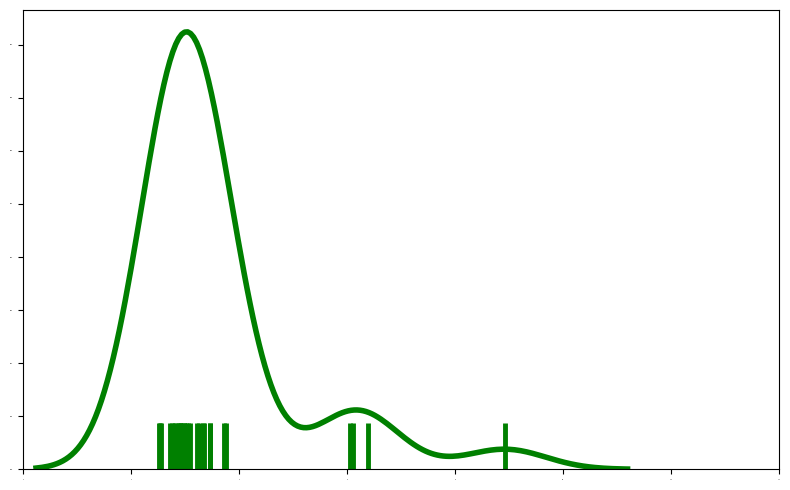

Valley between peaks at x = 4.728496813616027
No valley detected, unable to calculate count percentages.


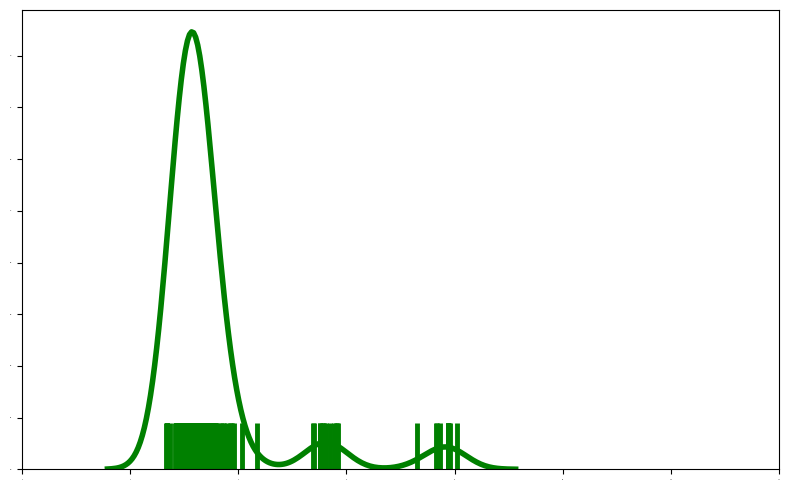

In [35]:
data = {g:[] for g in genotypes}

for i, genotype in enumerate(genotypes):
    plt.figure(figsize=(16, 4))
    
    folder = '/run/user/1003/gvfs/smb-share:server=tierra.cnic.es,share=sc/LAB_MT/LAB/Morena/Cri/Segmentation tests Mar2024/DATA/' + genotype + '/Segmentation(Stardist)/'
    
    mono_neg_intensity, _, _ = load_data(folder, 'monotot', 0)
    mono_pos_intensity, _, _ = load_data(folder, 'monotot', 1)
    bi_neg_intensity, _, _ = load_data(folder, 'bitot', 0)
    bi_pos_intensity, _, _ = load_data(folder, 'bitot', 1)
        
    mono_mu, mono_sigma = get_mu_s(mono_neg_intensity)
    bi_mu, bi_sigma = get_mu_s(bi_neg_intensity)
    
    mono_neg_intensity, mono_pos_intensity, bi_neg_intensity, bi_pos_intensity = center_kde({
        'mono_neg': normalize(mono_neg_intensity, mu=mono_mu, sigma=mono_sigma),
        'mono_pos': normalize(mono_pos_intensity, mu=mono_mu, sigma=mono_sigma),
        'bi_neg': normalize(bi_neg_intensity, mu=bi_mu, sigma=bi_sigma),
        'bi_pos': normalize(bi_pos_intensity, mu=bi_mu, sigma=bi_sigma)
    }, center=3)
    
    print(genotype)
    # plot_kde(
    #     mono_neg_intensity, mono_pos_intensity, 
    #     '', False, 1, 1, 2,
    #     xlim=[0, 14]
    # )
    # plt.savefig(f'kde_{genotype}_mono_SIN.svg', format='svg')
    # plt.show()
    # 
    # plot_kde(
    #     bi_neg_intensity, bi_pos_intensity, 
    #     '', False, 2, 1, 2,
    #     xlim=[0, 14]
    # )
    # 
    # plt.savefig(f'kde_{genotype}_bi_SIN.svg', format='svg')
    # plt.show()
    
    plot_kde_single(
        mono_pos_intensity, 
        '', False, 1, 1, 2,
        xlim=[0, 14]
    )
    
    plt.savefig(f'kde_{genotype}_mono.svg', format='svg')
    plt.show()        
    
    plot_kde_single(
        bi_pos_intensity, 
        '', False, 1, 1, 2,
        xlim=[0, 14], placeholder=True if genotype == 'WT MI' else False
    )
    
    plt.savefig(f'kde_{genotype}_bi.svg', format='svg')
    plt.show()
    
    plot_kde_single(
        mono_pos_intensity, 
        '', False, 1, 1, 2,
        xlim=[0, 14], valley=False
    )

    plt.savefig(f'kde_{genotype}_mono_clean.svg', format='svg')
    plt.show()

    plot_kde_single(
        bi_pos_intensity, 
        '', False, 1, 1, 2,
        xlim=[0, 14], valley=False
    )

    plt.savefig(f'kde_{genotype}_bi_clean.svg', format='svg')
    plt.show()

Statistical testings

<span style="color:red">**Revisar tipo de tests**</span>

As we are dealing with data with a bimodal distribution, we can use a two-sample t-test if the data is approximately normally distributed within each mode.

If the data is not normally distributed, we can use the Mann-Whitney U test. This test is a non-parametric test that does not assume normality in the data. At the contrary of the t-test, in which we compare the means, the **Mann-Whitney U test compares the differences in the rank sums of the two groups.**

In [6]:
def get_groups(
        genotype_1, genotype_2,
        type_1, type_2,
        brdu_1, brdu_2
):
    """
    Get the groups for the statistical tests.
    - Genotypes: WT MI, WT no MI, MYC MI, MYC no MI
    - Types: monotot, bitot
    - BrdU: 0, 1 (negative, positive)
    :return: 
    """
    
    folder_1 = 'C:\\Users\\ignac\\OneDrive\\Nacho\\CNIC\\Cicerone\\Cris\\Cris\\' + genotype_1 + '\\'
    folder_2 = 'C:\\Users\\ignac\\OneDrive\\Nacho\\CNIC\\Cicerone\\Cris\\Cris\\' + genotype_2 + '\\'
            
    group_1, _, _ = load_data(folder_1, type_1, brdu_1)
    group_2, _, _ = load_data(folder_2, type_2, brdu_2)
    
    return group_1, group_2

In [7]:
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import ks_2samp


def perform_test(group_1, group_2, type='t_test', plot=False, labels=None, title=''):
    """
    type: t_test, mann_whitney
    :return: 
    """
    # Test equality of variances
    _, p_val = levene(group_1, group_2)
    # print(
    #     f'Levene test: {p_val:.2f}'
    #     f'{" (Equal variances)" if p_val > 0.05 else " (Different variances)"}'
    # )
    
    if type == 't_test':
        # Two-sample t-test
        t_stat, p_value = ttest_ind(
            group_1, group_2,
            equal_var=False if p_val < 0.05 else True
        )
        print(
            f'{bc.BOLD}Two-sample t-test: {bc.ENDC}{p_value}'
            f'{" (Equal means)" if p_value > 0.05 else " (Different means)"}'
        )
    elif type == 'mann_whitney':
        # Mann-Whitney U test
        stat, p_value = mannwhitneyu(group_1, group_2)
        print(
            f'{bc.BOLD}Mann-Whitney U test: {bc.ENDC}{p_value}'
            f'{" (Equal means)" if p_value > 0.05 else " (Different means)"}'
        )
        
    if type == 'kolmogorov':
        stat, p_value = ks_2samp(group_1, group_2)
        print(
            f'{bc.BOLD}Kolmogorov-Smirnov test: {bc.ENDC}{p_value}'
            f'{" (Equal distributions)" if p_value > 0.05 else " (Different distributions)"}'
        )
        
    else:
        raise ValueError('Invalid test type')
    
    if plot:
        plot_kde(group_1, group_2, title, False, labels=labels)
        plt.show()

Compare BrdU positive and negative cells for each genotype

Monotot

In [176]:
for i, genotype in enumerate(genotypes):
    print(f'{bc.OKBLUE}Genotype: {bc.ENDC}{genotype}')
    mono_neg, mono_pos = get_groups(genotype, genotype, 'monotot', 'monotot', 0, 1)
    
    mu, sigma = get_mu_s(mono_neg)
    mono_neg = normalize(mono_neg, mu, sigma)
    mono_pos = normalize(mono_pos, mu, sigma)
    
    perform_test(mono_neg, mono_pos, 'mann_whitney', False)
    print()

Genotype: WT MI
Mann-Whitney U test: 0.94316 (Equal means)

Genotype: WT no MI(new)
Mann-Whitney U test: 0.36210 (Equal means)

Genotype: MYC MI
Mann-Whitney U test: 0.91168 (Equal means)

Genotype: MYC no MI
Mann-Whitney U test: 0.96577 (Equal means)



Bitot

In [177]:
for i, genotype in enumerate(genotypes):
    print(f'{bc.OKBLUE}Genotype: {bc.ENDC}{genotype}')
    bi_neg, bi_pos = get_groups(genotype, genotype, 'bitot', 'bitot', 0, 1)
    
    mu, sigma = get_mu_s(bi_neg)
    bi_neg = normalize(bi_neg, mu, sigma)
    bi_pos = normalize(bi_pos, mu, sigma)
    
    perform_test(bi_neg, bi_pos, 'mann_whitney', False)
    print()

Genotype: WT MI
Mann-Whitney U test: 0.68957 (Equal means)

Genotype: WT no MI(new)
Mann-Whitney U test: 0.02050 (Different means)

Genotype: MYC MI
Mann-Whitney U test: 0.00269 (Different means)

Genotype: MYC no MI
Mann-Whitney U test: 0.00485 (Different means)



Compare Myc and WT genotypes

Situations:
- MYC no MI mono negative vs WT no MI mono negative
- MYC MI mono negative vs WT MI mono negative
- MYC MI mono positive vs WT MI mono positive 

MYC no MI mono negative vs WT no MI mono negative

Kolmogorov-Smirnov test: 5.430277850403058e-32 (Different distributions)


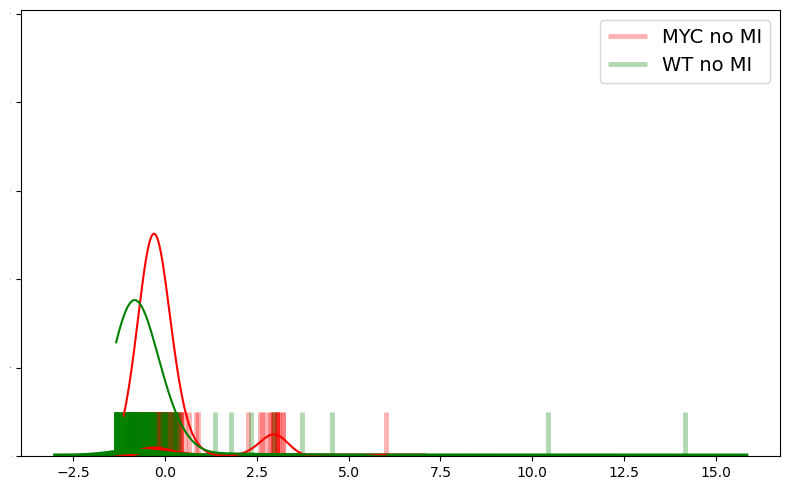

In [128]:
group_1, group_2 = get_groups('MYC no MI', 'WT no MI(new)', 'monotot', 'monotot', 0, 0)

mu, sigma = get_mu_s(group_1)
group_1 = normalize(group_1, mu, sigma)
group_2 = normalize(group_2, mu, sigma)

perform_test(group_1, group_2, 'kolmogorov', True, labels=['MYC no MI', 'WT no MI'])

MYC MI mono negative vs WT MI mono negative

Kolmogorov-Smirnov test: 5.35261498044624e-10 (Different distributions)


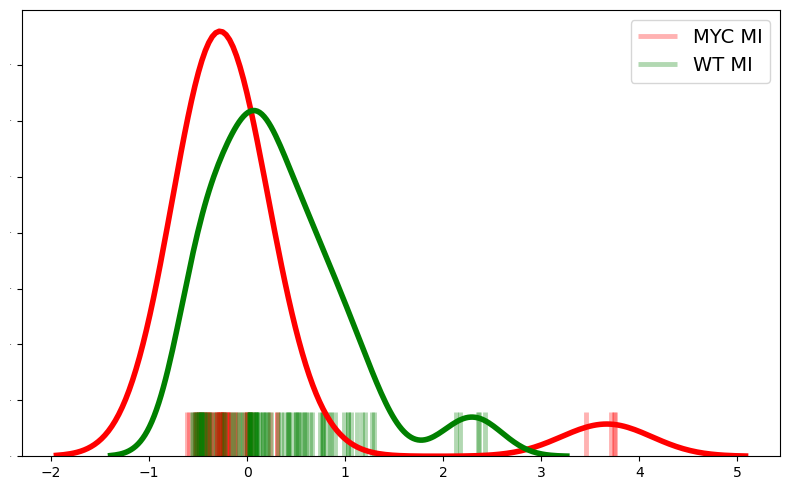

In [119]:
group_1, group_2 = get_groups('MYC MI', 'WT MI', 'monotot', 'monotot', 0, 0)

mu, sigma = get_mu_s(group_1)
group_1 = normalize(group_1, mu, sigma)
group_2 = normalize(group_2, mu, sigma)

perform_test(group_1, group_2, 'kolmogorov', True, labels=['MYC MI', 'WT MI'])

MYC MI mono positive vs WT MI mono positive

Kolmogorov-Smirnov test: 0.0006602189828267252 (Different distributions)


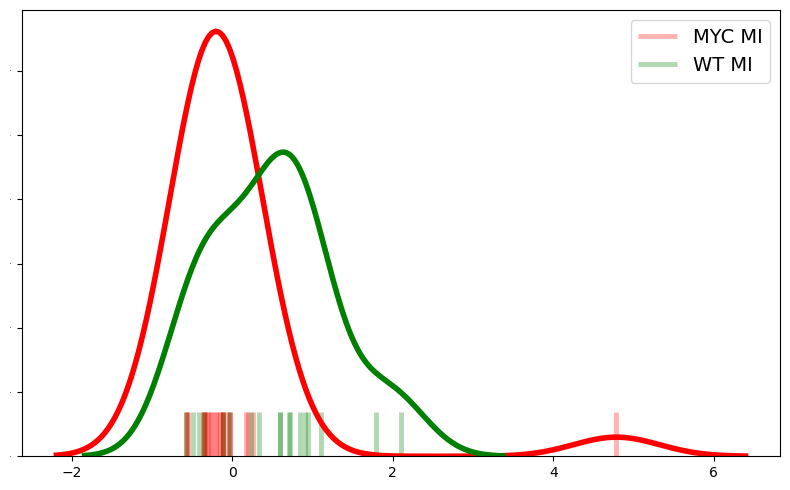

In [120]:
group_1, group_2 = get_groups('MYC MI', 'WT MI', 'monotot', 'monotot', 1, 1)

mu, sigma = get_mu_s(group_1)
group_1 = normalize(group_1, mu, sigma)
group_2 = normalize(group_2, mu, sigma)

perform_test(group_1, group_2, 'kolmogorov', True, labels=['MYC MI', 'WT MI'])

PAPER

- WT MI vs MYC no MI - bitot - BrdU negative
- WT MI vs MYC no MI - bitot - BrdU positive
- WT MI vs MYC no MI - bitot - All populations
----------------------------------------------
- MYC MI vs MYC no MI - bitot - BrdU negative
- MYC MI vs MYC no MI - bitot - BrdU positive
- MYC MI vs MYC no MI - bitot - All populations

Kolmogorov-Smirnov test: 1.04e-322 (Different distributions)


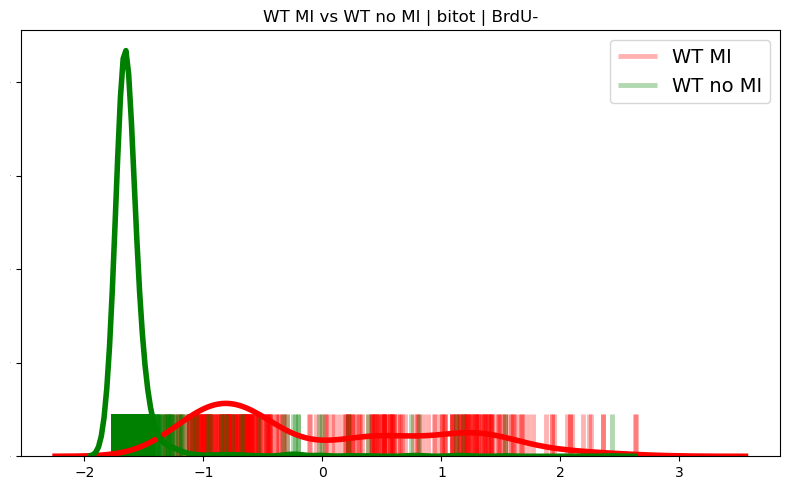

In [133]:
# WT MI vs WT no MI - bitot - BrdU negative
group_1, group_2 = get_groups('WT MI', 'WT no MI(new)', 'bitot', 'bitot', 0, 0)

mu, sigma = get_mu_s(group_1)
group_1 = normalize(group_1, mu, sigma)
group_2 = normalize(group_2, mu, sigma)

perform_test(
    group_1, group_2, 'kolmogorov', 
    True, labels=['WT MI', 'WT no MI'],
    title='WT MI vs WT no MI | bitot | BrdU-'
)

Kolmogorov-Smirnov test: 4.77395234464268e-52 (Different distributions)


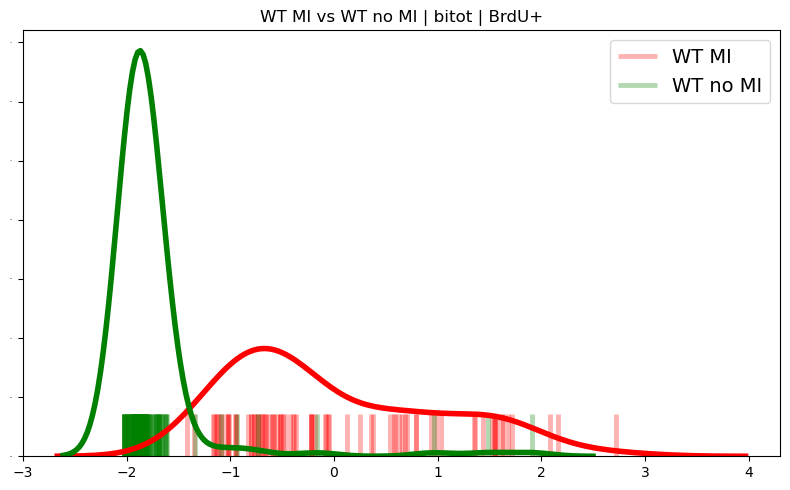

In [134]:
# WT MI vs WT no MI - bitot - BrdU positive
group_1, group_2 = get_groups('WT MI', 'WT no MI(new)', 'bitot', 'bitot', 1, 1)

mu, sigma = get_mu_s(group_1)
group_1 = normalize(group_1, mu, sigma)
group_2 = normalize(group_2, mu, sigma)

perform_test(
    group_1, group_2, 'kolmogorov', 
    True, labels=['WT MI', 'WT no MI'],
    title='WT MI vs WT no MI | bitot | BrdU+'
)

Kolmogorov-Smirnov test: 9e-323 (Different distributions)


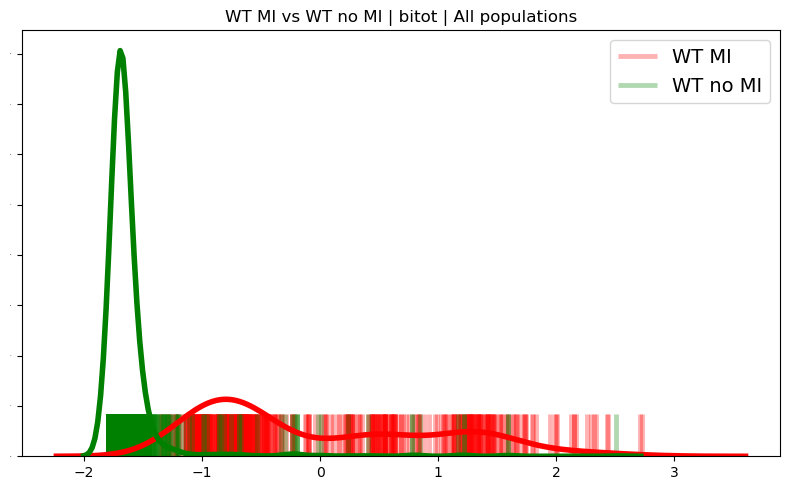

In [136]:
# WT MI vs WT no MI - bitot - All populations
group_1_neg, group_1_pos = get_groups('WT MI', 'WT MI', 'bitot', 'bitot', 0, 1)
group_2_neg, group_2_pos = get_groups('WT no MI(new)', 'WT no MI(new)', 'bitot', 'bitot', 0, 1)

group_1 = np.concatenate([group_1_neg, group_1_pos])
group_2 = np.concatenate([group_2_neg, group_2_pos])

mu, sigma = get_mu_s(group_1)
group_1 = normalize(group_1, mu, sigma)
group_2 = normalize(group_2, mu, sigma)

perform_test(
    group_1, group_2, 'kolmogorov', 
    True, labels=['WT MI', 'WT no MI'],
    title='WT MI vs WT no MI | bitot | All populations'
)

Kolmogorov-Smirnov test: 3.830092118234859e-289 (Different distributions)


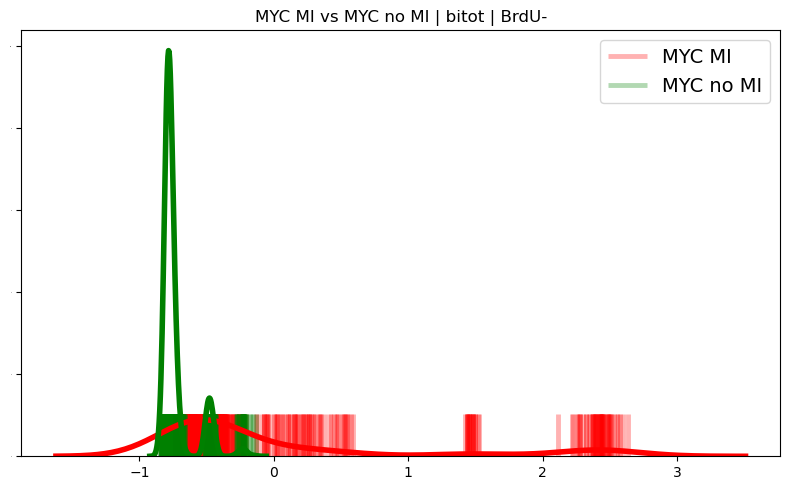

In [124]:
# MYC MI vs MYC no MI - bitot - BrdU negative
group_1, group_2 = get_groups('MYC MI', 'MYC no MI', 'bitot', 'bitot', 0, 0)

mu, sigma = get_mu_s(group_1)
group_1 = normalize(group_1, mu, sigma)
group_2 = normalize(group_2, mu, sigma)

perform_test(
    group_1, group_2, 'kolmogorov', 
    True, labels=['MYC MI', 'MYC no MI'],
    title='MYC MI vs MYC no MI | bitot | BrdU-'
)

Kolmogorov-Smirnov test: 6.012436344304233e-18 (Different distributions)


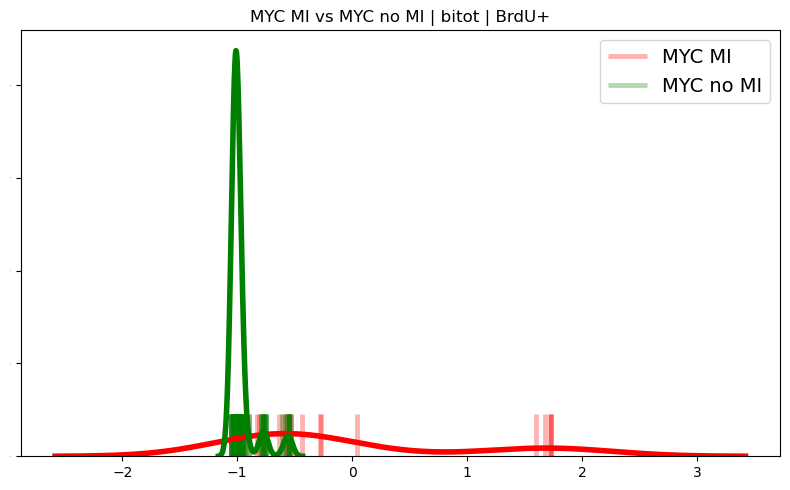

In [125]:
# MYC MI vs MYC no MI - bitot - BrdU positive
group_1, group_2 = get_groups('MYC MI', 'MYC no MI', 'bitot', 'bitot', 1, 1)

mu, sigma = get_mu_s(group_1)
group_1 = normalize(group_1, mu, sigma)
group_2 = normalize(group_2, mu, sigma)

perform_test(
    group_1, group_2, 'kolmogorov', 
    True, labels=['MYC MI', 'MYC no MI'],
    title='MYC MI vs MYC no MI | bitot | BrdU+'
)

Kolmogorov-Smirnov test: 1.7254491241922122e-307 (Different distributions)


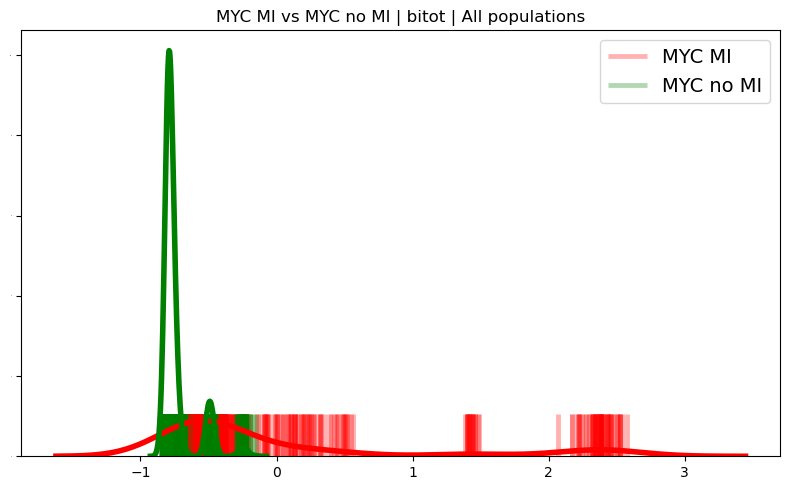

In [126]:
# MYC MI vs MYC no MI - bitot - All populations
group_1_neg, group_1_pos = get_groups('MYC MI', 'MYC MI', 'bitot', 'bitot', 0, 1)
group_2_neg, group_2_pos = get_groups('MYC no MI', 'MYC no MI', 'bitot', 'bitot', 0, 1)

group_1 = np.concatenate([group_1_neg, group_1_pos])
group_2 = np.concatenate([group_2_neg, group_2_pos])

mu, sigma = get_mu_s(group_1)
group_1 = normalize(group_1, mu, sigma)
group_2 = normalize(group_2, mu, sigma)

perform_test(
    group_1, group_2, 'kolmogorov', 
    True, labels=['MYC MI', 'MYC no MI'],
    title='MYC MI vs MYC no MI | bitot | All populations'
)

Using mutual information to compare distributions

In [84]:
# from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import gaussian_kde, ks_2samp, wasserstein_distance, entropy
from scipy.special import digamma

In [8]:
def get_kde(neg, pos):
    plt.ioff()
    kde_1 = sns.kdeplot(neg, linewidth=4, color='blue')
    kde_2 = sns.kdeplot(pos, linewidth=4, color='green')
    plt.ion()
    return kde_1.get_lines()[0].get_data(), kde_2.get_lines()[0].get_data()

def corr_coef(X, Y):
    corr = np.corrcoef(X, Y)[0, 1]
    plt.plot(X, Y, '.')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Correlation coefficient: {corr:.6f}')
    plt.show()
    
def kl_divergence(X, Y, bins=100):
    # Estimate PDF of X and Y using histogram bins
    X_hist, X_bins = np.histogram(X, bins=bins, density=True)
    Y_hist, Y_bins = np.histogram(Y, bins=bins, density=True)

    # Small epsilon to avoid divide by zero issues
    eps = 1e-10
    X_hist = np.clip(X_hist, eps, None)
    Y_hist = np.clip(Y_hist, eps, None)

    # Normalize histograms
    X_hist /= X_hist.sum()
    Y_hist /= Y_hist.sum()

    # Compute KL divergence for both directions
    kl_XY = entropy(X_hist, Y_hist, base=None)  # KL(X || Y)
    kl_YX = entropy(Y_hist, X_hist, base=None)  # KL(Y || X)
    return kl_XY, kl_YX

def permutation_test(X, Y, num_permutations=1000, metric='wasserstein'):
    combined = np.concatenate([X, Y])
    observed_stat = None

    if metric == 'wasserstein':
        observed_stat = wasserstein_distance(X, Y)
    elif metric == 'ks':
        observed_stat, _ = ks_2samp(X, Y)

    permuted_stats = []
    for _ in range(num_permutations):
        np.random.shuffle(combined)
        X_perm = combined[:len(X)]
        Y_perm = combined[len(X):]
        if metric == 'wasserstein':
            permuted_stat = wasserstein_distance(X_perm, Y_perm)
        elif metric == 'ks':
            permuted_stat, _ = ks_2samp(X_perm, Y_perm)
        permuted_stats.append(permuted_stat)

    # Calculate p-value: proportion of permuted stats >= observed stat
    permuted_stats = np.array(permuted_stats)
    p_value = np.mean(permuted_stats >= observed_stat)
    return observed_stat, p_value
    
def mutual_info(X, Y, bins=1000):
    # Compute 2D histogram
    hist_2d, x_edges, y_edges = np.histogram2d(X, Y, bins=bins)

    # Convert histogram to joint probability distribution
    pxy = hist_2d / float(np.sum(hist_2d))

    # Marginal probabilities
    px = np.sum(pxy, axis=1)  # Sum over Y-axis to get marginal of X
    py = np.sum(pxy, axis=0)  # Sum over X-axis to get marginal of Y

    # Compute the outer product of px and py
    px_py = np.outer(px, py)

    # Only consider non-zero joint probabilities to avoid log(0)
    nonzeros = pxy > 0

    # Mutual Information formula
    mi = np.sum(pxy[nonzeros] * np.log(pxy[nonzeros] / px_py[nonzeros]))

    return mi

# def entropy(prob_dist):
#     """Calculate entropy of a probability distribution."""
#     return -np.sum(prob_dist[prob_dist > 0] * np.log(prob_dist[prob_dist > 0]))

def mutual_info(X, Y, bins=1000):
    """Calculate Mutual Information (MI) between two distributions."""
    hist_2d, x_edges, y_edges = np.histogram2d(X, Y, bins=bins)

    pxy = hist_2d / float(np.sum(hist_2d))
    px = np.sum(pxy, axis=1)
    py = np.sum(pxy, axis=0)
    px_py = np.outer(px, py)

    nonzeros = pxy > 0

    # Mutual Information formula
    mi = np.sum(pxy[nonzeros] * np.log(pxy[nonzeros] / px_py[nonzeros]))

    return mi

def expected_mutual_info(n, bins):
    """Estimate the expected MI under random labelings.
    Using an approximation for the expected mutual information.
    """
    e_mi = (digamma(n) - digamma(bins)) * bins * bins / n
    return e_mi

def adjusted_mutual_info(X, Y, bins=1000):
    """Calculate Adjusted Mutual Information (AMI) between two distributions."""
    n = len(X)  # Number of samples
    
    # Compute MI
    mi = mutual_info(X, Y, bins=bins)

    # Compute Entropies of X and Y
    hist_X, _ = np.histogram(X, bins=bins)
    hist_Y, _ = np.histogram(Y, bins=bins)

    pX = hist_X / float(np.sum(hist_X))
    pY = hist_Y / float(np.sum(hist_Y))

    H_U = entropy(pX)  # Entropy of X
    H_V = entropy(pY)  # Entropy of Y

    # Expected MI under random labelings
    e_mi = expected_mutual_info(n, bins)

    # Average entropy
    avg_entropy = (H_U + H_V) / 2.0

    # Adjusted MI formula
    ami = (mi - e_mi) / (avg_entropy - e_mi)

    return ami

def bootstrap_test(X, Y, num_bootstrap_samples=1000):
    # Compute observed MI/AMI between pre- and post-infarct data
    observed_mi = mutual_info_regression(X.reshape(-1, 1), Y.reshape(-1, 1), discrete_features=[False])
    # observed_ami = adjusted_mutual_info(X, Y)
    
    mi_bootstrap = []
    # ami_bootstrap = []
    
    n_samples_x = len(X)  # Number of samples in the original data
    n_samples_y = len(Y)

    # Perform bootstrap sampling and compute MI/AMI for each sample
    for _ in range(num_bootstrap_samples):
        # Resample X and Y with replacement
        X_resampled = np.random.choice(X, size=n_samples_x, replace=True)
        Y_resampled = np.random.choice(Y, size=n_samples_y, replace=True)  
        
        # Compute MI and AMI for resampled data
        mi_bootstrap.append(mutual_info_regression(X_resampled.reshape(-1, 1), Y_resampled.reshape(-1, 1), discrete_features=[False]))
        # ami_bootstrap.append(adjusted_mutual_info(X_resampled, Y_resampled))
    
    # Convert lists to numpy arrays for easier calculations
    mi_bootstrap = np.array(mi_bootstrap)
    # ami_bootstrap = np.array(ami_bootstrap)
    
    # Calculate p-values as the proportion of bootstrap MI/AMI >= observed MI/AMI
    p_value_mi = np.mean(mi_bootstrap >= observed_mi)
    # p_value_ami = np.mean(ami_bootstrap >= observed_ami)
    
    # return observed_mi, p_value_mi, observed_ami, p_value_ami
    return observed_mi, p_value_mi

def plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=False, labels=None, num_points=100):
    f, (ax_box1, ax_box2, ax_dist, ax_rug1, ax_rug2) = plt.subplots(
        5, sharex=True, gridspec_kw= {
            "height_ratios": (0.2, 0.2, 1, 0.05, 0.05)
        }
    )
    
    if labels is None:
        labels = ['X', 'Y']
    
    median_X = np.median(X)
    median_Y = np.median(Y)
        
    sns.boxplot(X, ax=ax_box1, color='blue', orient='h')
    sns.boxplot(Y, ax=ax_box2, color='g', orient='h')
    ax_box1.axvline(median_X, color='blue', linestyle='--')
    ax_box2.axvline(median_Y, color='g', linestyle='--')
    
    # common_bins = np.histogram_bin_edges(np.concatenate([X, Y]), bins=num_points)
    if binnarize:
        X_mod = np.digitize(X_mod, bins=np.histogram_bin_edges(X_mod, bins=num_points))
        Y_mod = np.digitize(Y_mod, bins=np.histogram_bin_edges(Y_mod, bins=num_points))
        
    # observed_mi, p_value_mi, observed_ami, p_value_ami = bootstrap_test(X_mod, Y_mod)
    observed_mi, p_value_mi = bootstrap_test(X_mod, Y_mod)
    _, p_val_wass = permutation_test(X_mod, Y_mod, metric='wasserstein')
    kl_XY, kl_YX = kl_divergence(X_mod, Y_mod)
    
    plt.subplots_adjust(top=0.87)
    plt.suptitle(
        # f'Mutual Information={mutual_info_score(X_mod, Y_mod):.5f}'
        # f'Mutual Information={mutual_info(X_mod, Y_mod):.5f}'
        # + f'\nAdjusted Mutual Information={adjusted_mutual_info(X_mod, Y_mod)}'
        f'\nMI={mutual_info_regression(X_mod.reshape(-1, 1), Y_mod.reshape(-1, 1), discrete_features=[False])[0]} - p-val={p_value_mi}'
        # + f'\nBootstrap test p-val (AMI): {p_value_ami}',
        + f'\nKolmogorov-Smirnov test p-val: {ks_2samp(X_mod, Y_mod)[1]}'
        + f'\nWasserstein distance={wasserstein_distance(X_mod, Y_mod)} - p-val{p_val_wass}'
        + f'\nKL Divergence (X||Y): {kl_XY:.5f}, (Y||X): {kl_YX:.5f}',
        fontsize = 6,
    )
    
    sns.rugplot(X, color='blue', ax=ax_rug1, alpha=.2, height=1)
    sns.rugplot(Y, color='g', ax=ax_rug2, alpha=.2, height=1)
    
    for a in [ax_rug1, ax_rug2]:
        a.set(
            xlabel='', ylabel='',
            xticklabels=[], yticklabels=[],
            xticks=[], yticks=[]
        )
        
        for spine in a.spines.values():
            spine.set_visible(False)
    
    ax_dist.plot(x_interp, X_mod, color='blue', label=labels[0])
    ax_dist.plot(y_interp, Y_mod, color='g', label=labels[1])
    
    ax_dist.fill_between(x_interp, X_mod, color='blue', alpha=0.2)
    ax_dist.fill_between(y_interp, Y_mod, color='green', alpha=0.2)
    
    ax_dist.axvline(median_X, color='blue', linestyle='--')
    ax_dist.axvline(median_Y, color='g', linestyle='--')
    
    ax_dist.legend()
    ax_box1.set(xlabel='', ylabel='')
    ax_box2.set(xlabel='', ylabel='')
    ax_dist.set(
        xlabel='', ylabel='',
        xticklabels=[], yticklabels=[]
    )
    plt.savefig(f'{labels}.svg', format='svg')
    plt.show()

In [9]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

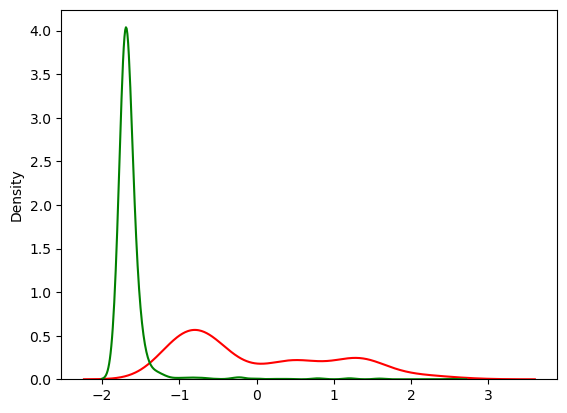

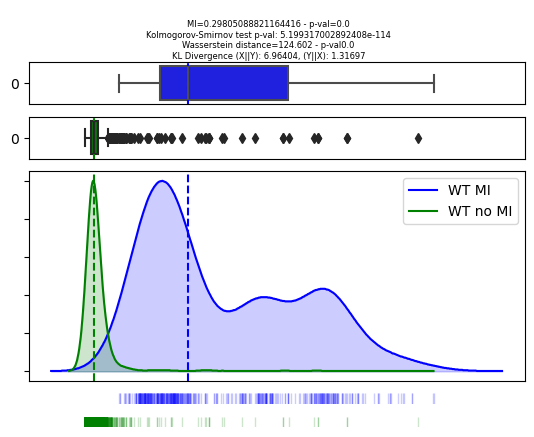

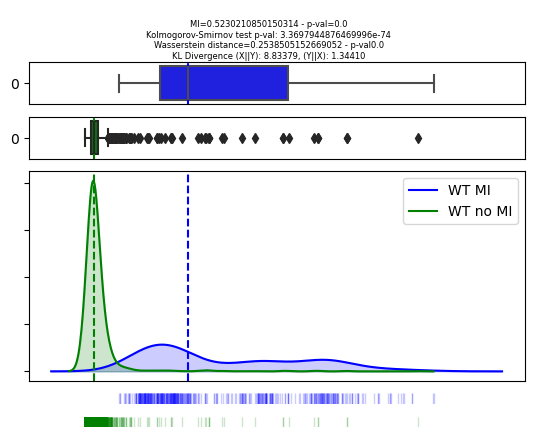

In [91]:
# WT MI vs WT no MI - bitot - All population
num_points = 500

X_neg, X_pos = get_groups('WT MI', 'WT MI', 'bitot', 'bitot', 0, 1)
Y_neg, Y_pos = get_groups('WT no MI(new)', 'WT no MI(new)', 'bitot', 'bitot', 0, 1)

X = np.concatenate([X_neg, X_pos])
Y = np.concatenate([Y_neg, Y_pos])

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)

X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=True, labels=['WT MI', 'WT no MI'], num_points=num_points)
plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=False, labels=['WT MI', 'WT no MI'], num_points=num_points)

34.083073908138715 12.47253302815082


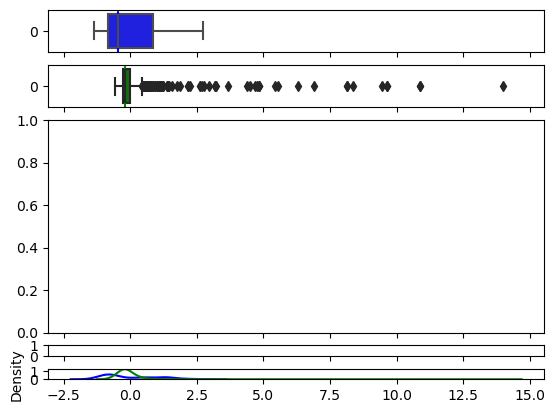

<Figure size 640x480 with 0 Axes>

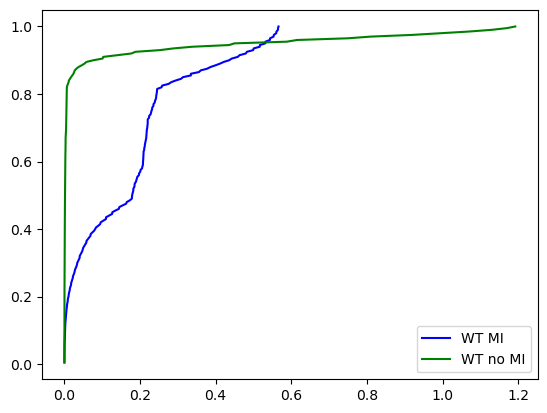

<Figure size 640x480 with 0 Axes>

In [32]:
def eCDF(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

def plot_ecdf(X, Y, labels=None):
    x, y = eCDF(X)
    plt.plot(x, y, label=labels[0], color='blue')
    
    x, y = eCDF(Y)
    plt.plot(x, y, label=labels[1], color='green')
    
    plt.legend()
    plt.show()
    
def PDF(X, Y, labels=None):
    """
    Creates a probability density function plot for two distributions.
    As a KDE is used, we need to ensure that the sum of the probabilities is 1.
    For non-parametric data, we can use the KDE to estimate the PDF.
    Without gaussian_kde, we can use the histogram to estimate the PDF.
    """
    kde_x = sns.kdeplot(X, color='blue').get_lines()[0].get_data()
    kde_y = sns.kdeplot(Y, color='green').get_lines()[1].get_data()
    
    integral_x = np.trapz(kde_x[1], kde_x[0])
    integral_y = np.trapz(kde_y[1], kde_y[0])
    
    pdf_x = kde_x[1] / integral_x
    pdf_y = kde_y[1] / integral_y
    
    plt.plot(pdf_x, color='blue', label=labels[0])
    plt.plot(pdf_y, color='green', label=labels[1])
    
    return pdf_x, pdf_y

def plot_pdf(X, Y, labels=None):
    pdf_x, pdf_y = PDF(X, Y, labels)
    
    plt.plot(pdf_x, color='blue', label=labels[0])
    plt.plot(pdf_y, color='green', label=labels[1])
    
    plt.legend()
    plt.show()
    
    
def plot_dist(X, Y, labels=None, norm=True, kde=False, num_points=100):
    f, (ax_box1, ax_box2, ax_dist, ax_rug1, ax_rug2) = plt.subplots(
        5, sharex=True, gridspec_kw= {
            "height_ratios": (0.2, 0.2, 1, 0.05, 0.05)
        }
    )
    
    if norm:
        mu_x, sigma_x = get_mu_s(X)
        X = np.array(normalize(X, mu_x, sigma_x))
        
        mu_y, sigma_y = get_mu_s(Y)
        Y = np.array(normalize(Y, mu_y, sigma_y))
    
    median_X = np.median(X)
    median_Y = np.median(Y)
        
    sns.boxplot(X, ax=ax_box1, color='blue', orient='h')
    sns.boxplot(Y, ax=ax_box2, color='g', orient='h')
    ax_box1.axvline(median_X, color='blue', linestyle='--')
    ax_box2.axvline(median_Y, color='g', linestyle='--')
    
    if kde:
        kde_X = sns.kdeplot(X, color='blue').get_lines()[0].get_data()
        kde_Y = sns.kdeplot(Y, color='green').get_lines()[1].get_data()
        print(np.sum(kde_X[1]), np.sum(kde_Y[1]))
        plt.show()
        
        X = kde_X[1]
        Y = kde_Y[1]
            
    ks_stat, ks_pval = ks_2samp(X, Y)
    
    plt.subplots_adjust(top=0.87)
    plt.suptitle(
        f'\nKolmogorov-Smirnov test stat: {ks_stat}'
        f'\nKolmogorov-Smirnov test p-val: {ks_pval}',
        fontsize = 8,
    )
    
    sns.rugplot(X, color='blue', ax=ax_rug1, alpha=.2, height=1)
    sns.rugplot(Y, color='g', ax=ax_rug2, alpha=.2, height=1)
    
    for a in [ax_rug1, ax_rug2]:
        a.set(
            xlabel='', ylabel='',
            xticklabels=[], yticklabels=[],
            xticks=[], yticks=[]
        )
        
        for spine in a.spines.values():
            spine.set_visible(False)
    
    if kde:
        ax_dist.plot(X, color='blue')
        ax_dist.plot(Y, color='green')
    else:
        sns.histplot(X, color='blue', ax=ax_dist, kde=True)
        sns.histplot(Y, color='green', ax=ax_dist, kde=True)

    ax_dist.axvline(median_X, color='blue', linestyle='--')
    ax_dist.axvline(median_Y, color='g', linestyle='--')
    
    ax_box1.set(xlabel='', ylabel='')
    ax_box2.set(xlabel='', ylabel='')
    ax_dist.set(
        xlabel='', ylabel='',
        xticklabels=[], yticklabels=[]
    )
    plt.savefig(f'{labels}.svg', format='svg')
    plt.show()
    
    plt.savefig(f'dist.svg', format='svg')
    plot_ecdf(X, Y, labels=['WT MI', 'WT no MI'])
    plt.savefig(f'cdf.svg', format='svg')
    

X_neg, X_pos = get_groups('WT MI', 'WT MI', 'bitot', 'bitot', 0, 1)
Y_neg, Y_pos = get_groups('WT no MI(new)', 'WT no MI(new)', 'bitot', 'bitot', 0, 1)

X = np.concatenate([X_neg, X_pos])
Y = np.concatenate([Y_neg, Y_pos])

plot_dist(X, Y, labels=['WT MI', 'WT no MI'], norm=True, kde=True)

In [10]:
X_neg, X_pos = get_groups('WT MI', 'WT MI', 'bitot', 'bitot', 0, 1)
Y_neg, Y_pos = get_groups('WT no MI(new)', 'WT no MI(new)', 'bitot', 'bitot', 0, 1)

X = np.concatenate([X_neg, X_pos])
Y = np.concatenate([Y_neg, Y_pos])

mu_x, sigma_x = get_mu_s(X)
X = np.array(normalize(X, mu_x, sigma_x))

mu_y, sigma_y = get_mu_s(Y)
Y = np.array(normalize(Y, mu_y, sigma_y))

plot_ecdf(X, Y, labels=['WT MI', 'WT no MI'])

print(ks_2samp(X, Y))

NameError: name 'plot_ecdf' is not defined

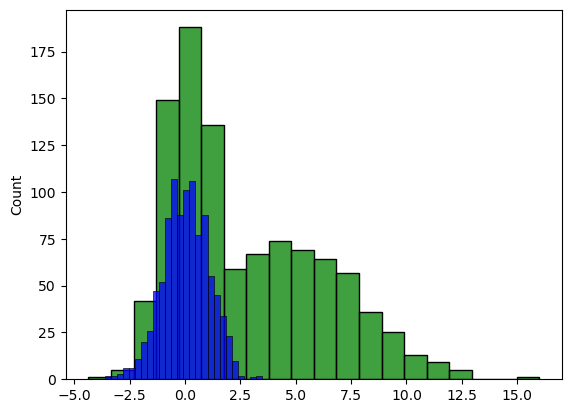

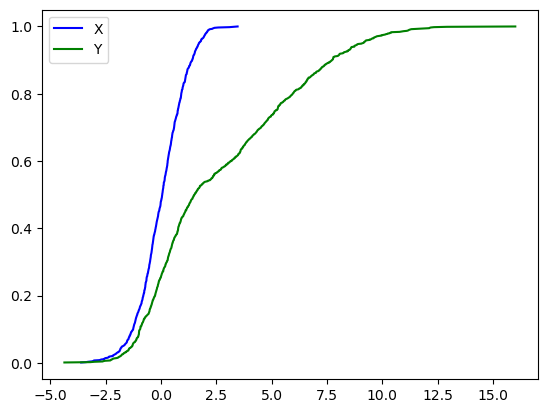

KstestResult(statistic=0.449, pvalue=3.866163455650273e-91, statistic_location=2.169895321980235, statistic_sign=1)


In [23]:
def eCDF(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

def plot_ecdf(X, Y, labels=None):
    x, y = eCDF(X)
    plt.plot(x, y, label=labels[0], color='blue')
    
    x, y = eCDF(Y)
    plt.plot(x, y, label=labels[1], color='green')
    
    plt.legend()
    plt.show()

X = np.random.normal(0, 1, 1000)

Y1 = np.random.normal(0, 1, 500)
Y2 = np.random.normal(5, 3, 500)
Y = np.concatenate([Y1, Y2])

sns.histplot(Y, color='green')
sns.histplot(X, color='blue')
plt.show()


plot_ecdf(X, Y, labels=['X', 'Y'])

print(ks_2samp(X, Y))

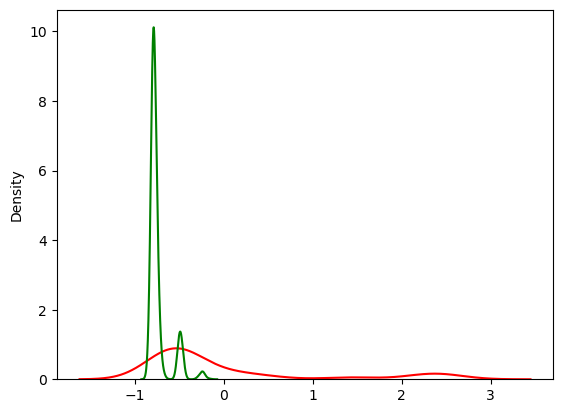

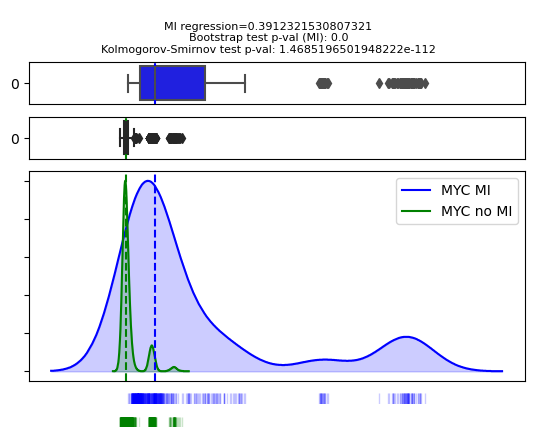

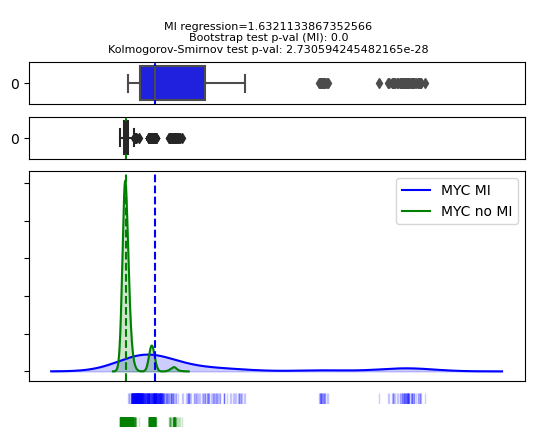

In [61]:

# MYC MI vs MYC no MI - bitot - All population
X_neg, X_pos = get_groups('MYC MI', 'MYC MI', 'bitot', 'bitot', 0, 1)
Y_neg, Y_pos = get_groups('MYC no MI', 'MYC no MI', 'bitot', 'bitot', 0, 1)

X = np.concatenate([X_neg, X_pos])
Y = np.concatenate([Y_neg, Y_pos])

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)
X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=True, labels=['MYC MI', 'MYC no MI'], num_points=num_points)
plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=False, labels=['MYC MI', 'MYC no MI'], num_points=num_points)

WT MI | Bi | BrdU+ vs WT no MI | Bi | BrdU+

WT MI | Bi | BrdU- vs WT no MI | Bi | BrdU-

WT MI | Mono | BrdU+ vs WT no MI | Mono | BrdU+

WT MI | Mono | BrdU- vs WT no MI | Mono | BrdU-
 
---

MYC MI | Bi | BrdU+ vs MYC no MI | Bi | BrdU+

MYC MI | Bi | BrdU- vs MYC no MI | Bi | BrdU-

MYC MI | Mono | BrdU+ vs MYC no MI | Mono | BrdU+

MYC MI | Mono | BrdU- vs MYC no MI | Mono | BrdU-

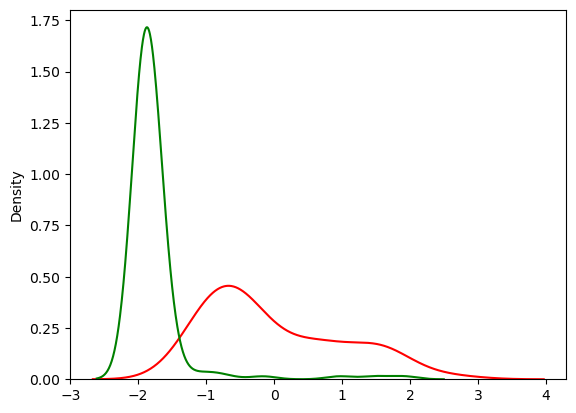

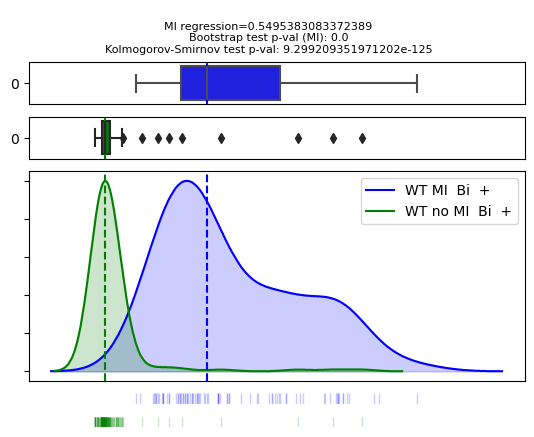

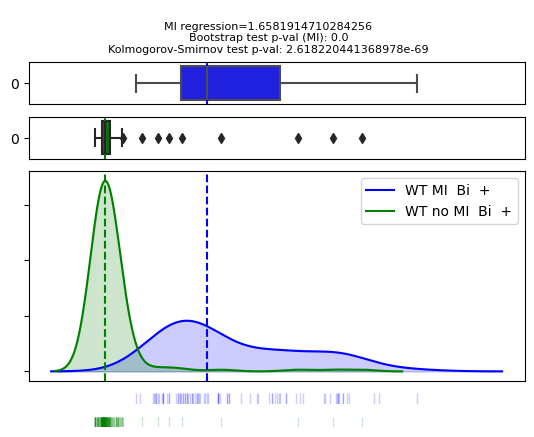

In [62]:
# WT MI | Bi | BrdU+ vs WT no MI | Bi | BrdU+
X, Y = get_groups('WT MI', 'WT no MI(new)', 'bitot', 'bitot', 1, 1)

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)
X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=True, labels=['WT MI  Bi  +', 'WT no MI  Bi  +'], num_points=num_points)
plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=False, labels=['WT MI  Bi  +', 'WT no MI  Bi  +'], num_points=num_points)

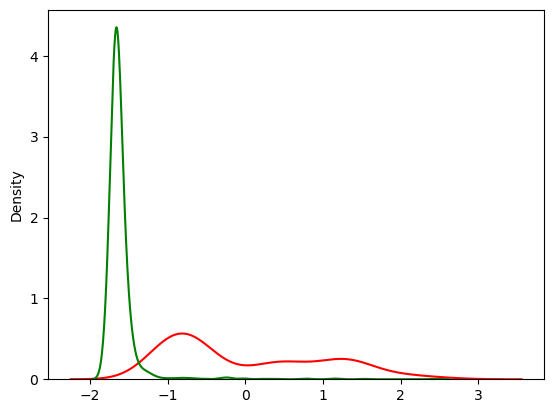

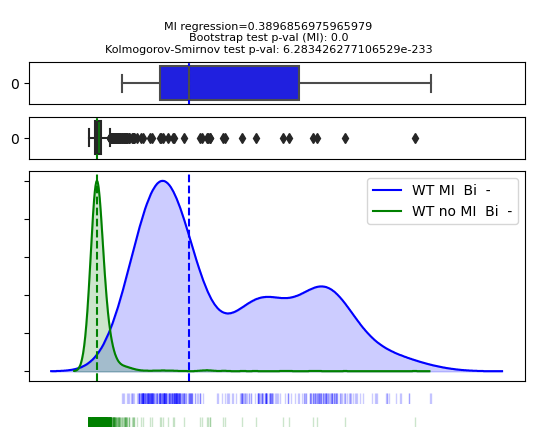

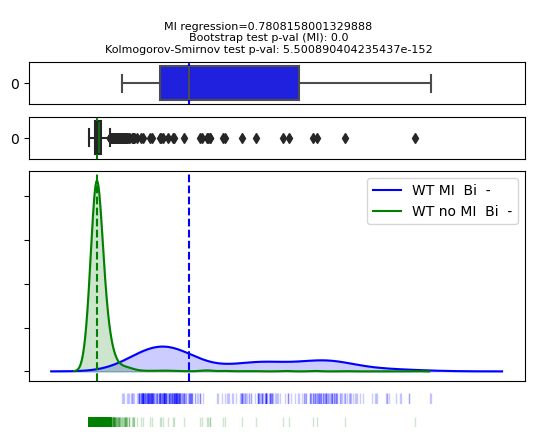

In [63]:
# WT MI | Bi | BrdU- vs WT no MI | Bi | BrdU- 
X, Y = get_groups('WT MI', 'WT no MI(new)', 'bitot', 'bitot', 0, 0)

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)
X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=True, labels=['WT MI  Bi  -', 'WT no MI  Bi  -'], num_points=num_points)
plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=False, labels=['WT MI  Bi  -', 'WT no MI  Bi  -'], num_points=num_points)

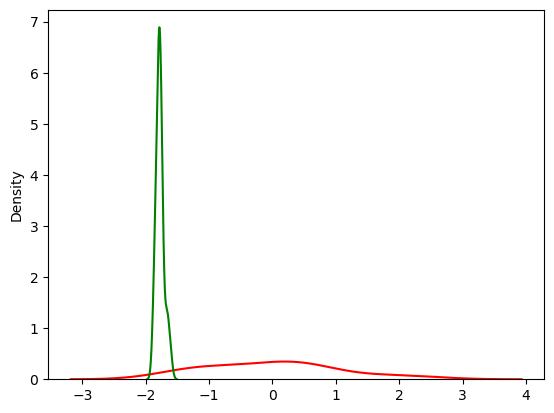

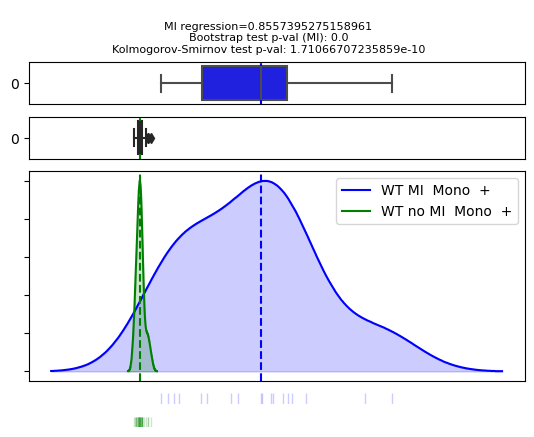

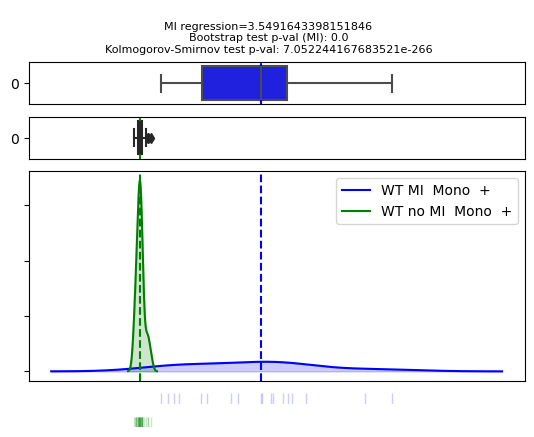

In [64]:
X, Y = get_groups('WT MI', 'WT no MI(new)', 'monotot', 'monotot', 1, 1)

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)
X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=True, labels=['WT MI  Mono  +', 'WT no MI  Mono  +'], num_points=num_points)
plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=False, labels=['WT MI  Mono  +', 'WT no MI  Mono  +'], num_points=num_points)

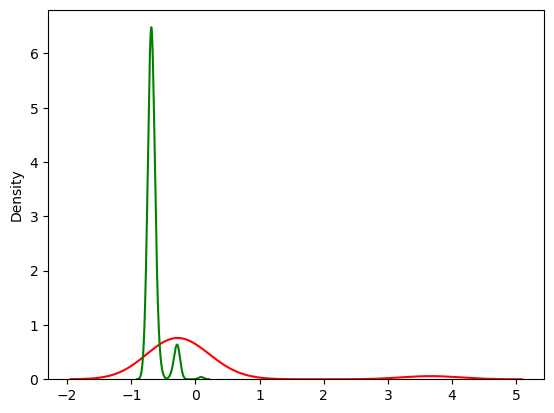

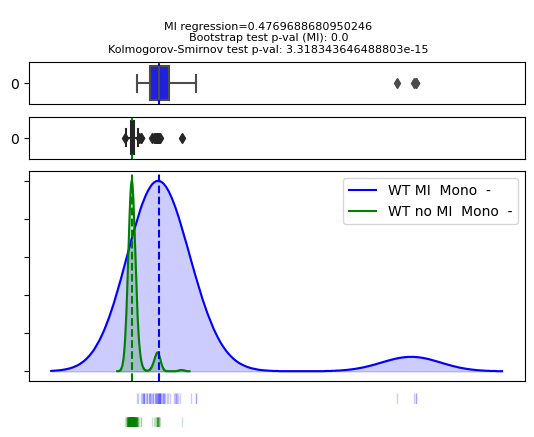

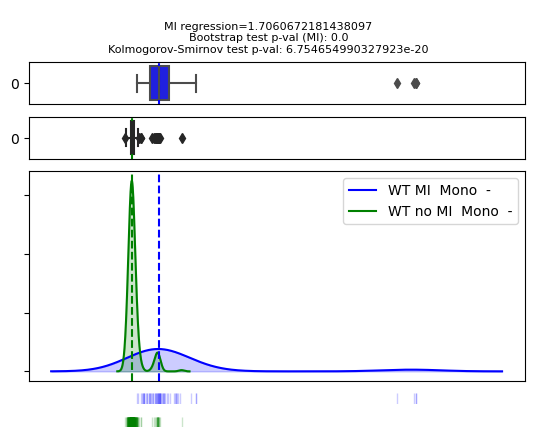

In [65]:
# MYC MI | Bi | BrdU- vs MYC no MI | Bi | BrdU-
X, Y = get_groups('MYC MI', 'MYC no MI', 'monotot', 'monotot', 0, 0)

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)
X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=True, labels=['WT MI  Mono  -', 'WT no MI  Mono  -'], num_points=num_points)
plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=False, labels=['WT MI  Mono  -', 'WT no MI  Mono  -'], num_points=num_points)

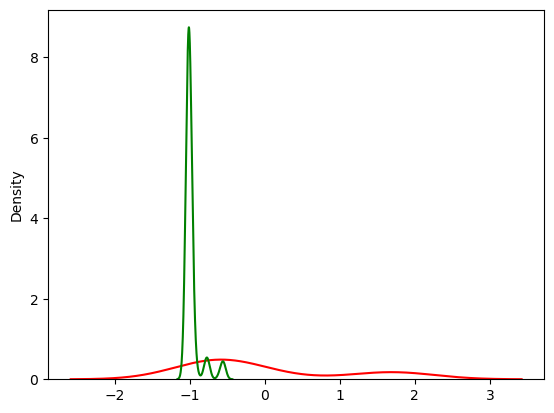

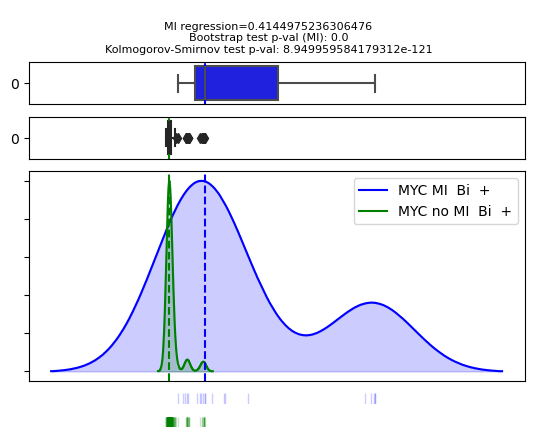

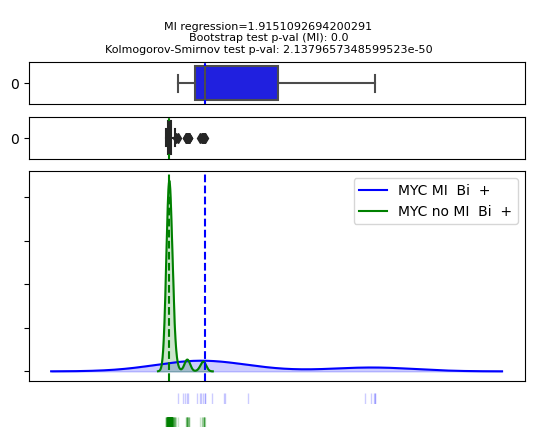

In [66]:
X, Y = get_groups('MYC MI', 'MYC no MI', 'bitot', 'bitot', 1, 1)

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)
X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=True, labels=['MYC MI  Bi  +', 'MYC no MI  Bi  +'], num_points=num_points)
plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=False, labels=['MYC MI  Bi  +', 'MYC no MI  Bi  +'], num_points=num_points)

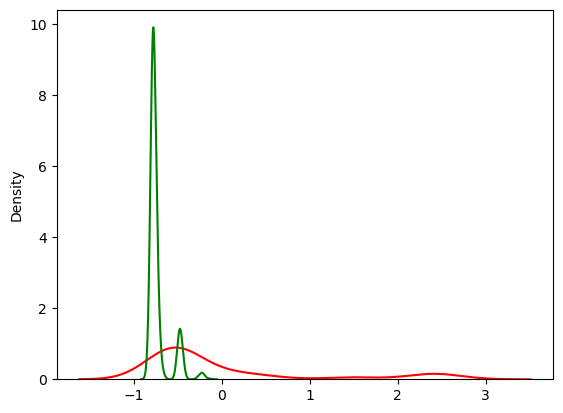

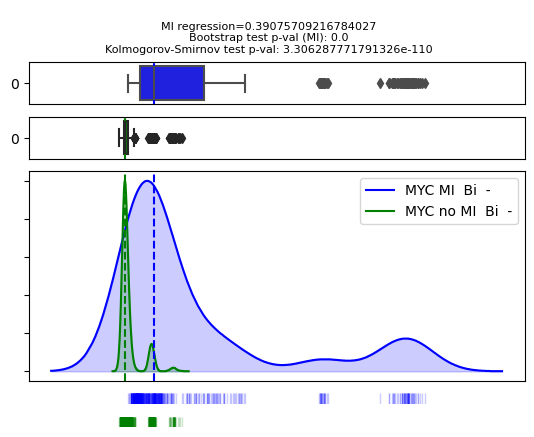

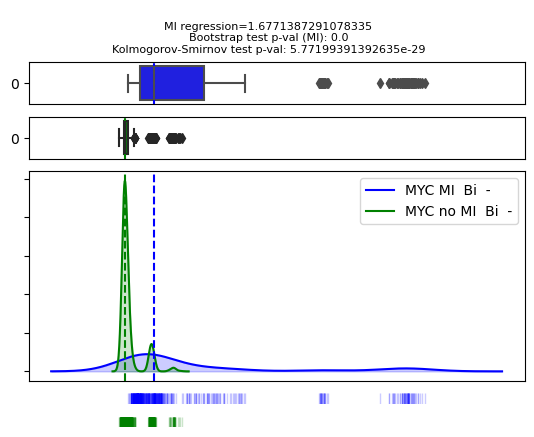

In [67]:
X, Y = get_groups('MYC MI', 'MYC no MI', 'bitot', 'bitot', 0, 0)

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)
X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=True, labels=['MYC MI  Bi  -', 'MYC no MI  Bi  -'], num_points=num_points)
plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=False, labels=['MYC MI  Bi  -', 'MYC no MI  Bi  -'], num_points=num_points)

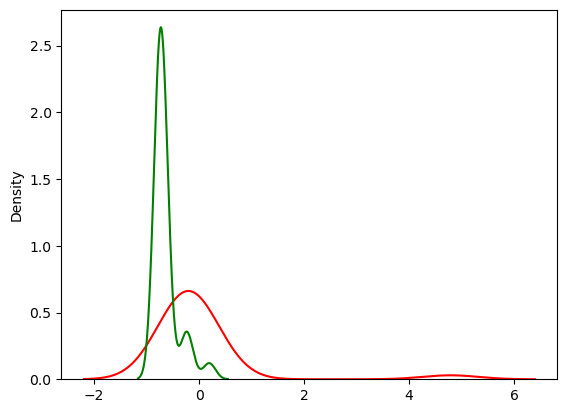

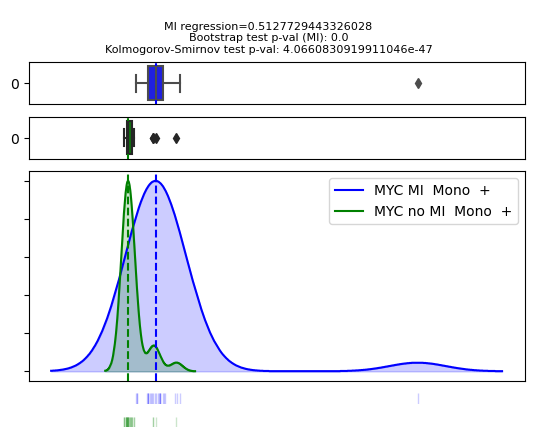

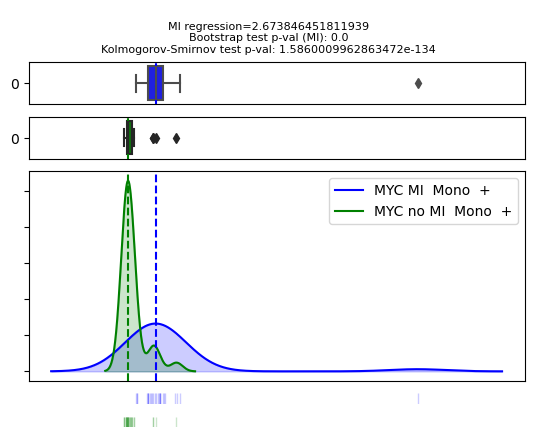

In [68]:
X, Y = get_groups('MYC MI', 'MYC no MI', 'monotot', 'monotot', 1, 1)

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)
X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=True, labels=['MYC MI  Mono  +', 'MYC no MI  Mono  +'], num_points=num_points)
plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=False, labels=['MYC MI  Mono  +', 'MYC no MI  Mono  +'], num_points=num_points)

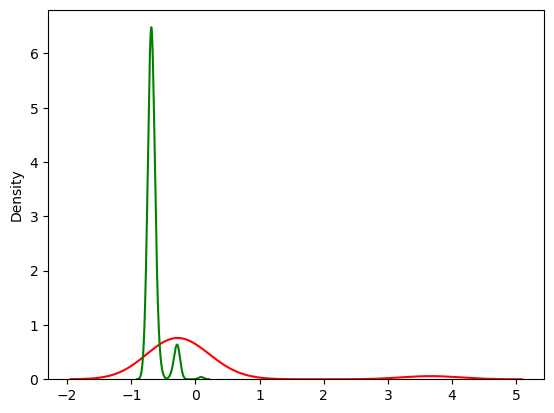

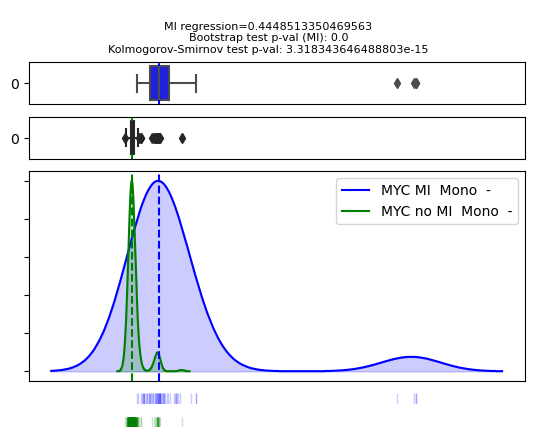

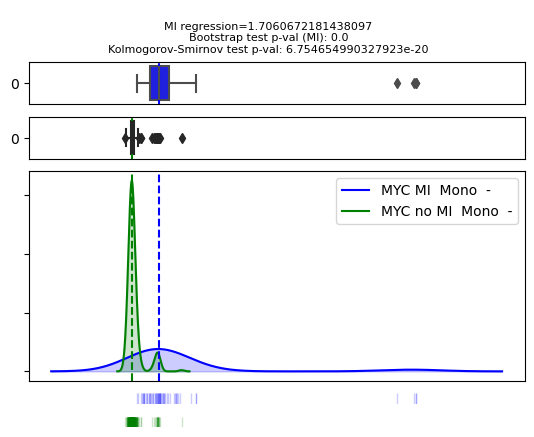

In [69]:
X, Y = get_groups('MYC MI', 'MYC no MI', 'monotot', 'monotot', 0, 0)

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)
X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=True, labels=['MYC MI  Mono  -', 'MYC no MI  Mono  -'], num_points=num_points)
plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, binnarize=False, labels=['MYC MI  Mono  -', 'MYC no MI  Mono  -'], num_points=num_points)